In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats as ss

import datetime
import time
from datetime import datetime
from datetime import timedelta



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from IPython.core.pylabtools import figsize

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; }</style>"))

pd.set_option('display.max_columns', 273)
pd.set_option('display.max_rows', 273)

In [2]:
# Python 3 program for Elo Rating
import math
 
# Function to calculate the Probability
def Probability(rating1, rating2):
 
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (rating2 - rating1) / 400))

In [3]:
df = pd.DataFrame()
df_tier = pd.DataFrame()

countries = ['Brazil','Belgium','Argentina','France','England','Spain','Netherlands','Portugal',
'Denmark','Germany','Croatia','Mexico','Uruguay','Switzerland','United_States','Senegal',
'Wales','Iran','Serbia','Morocco','Japan','Poland','Korea','Tunisia','Costa_Rica','Australia',
'Canada','Cameroon','Ecuador','Qatar','Saudi_Arabia','Ghana']

countries_interest = ['Brazil','Argentina','England','Netherlands','Croatia','Uruguay','Wales','Ecuador','Qatar']

elos = [2169,2025,2143,2005,1920,2045,2040,2004,1971,1963,1927,1809,
1936,1902,1798,1687,1790,1797,1892,1753,1787,1814,1786,1707,1743,
1719,1776,1609,1833,1680,1635,1567]

coins_per_win = [1,1,1,1,2,2,2,2,4,4,4,4,8,8,8,8,16,16,16,16,32,32,32,32,64,64,64,64,128,128,128,128]

price = [75,26,60,56,45,50,36,30,23,39,17,12,17,12,11,12,11,8,13,9,9,10,9,8,8,8,9,9,9,8,8,9]

groups = [
['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
['England', 'Iran', 'United_States', 'Wales'],
['Argentina', 'Saudi_Arabia', 'Mexico', 'Poland'],
['France', 'Australia', 'Denmark', 'Tunisia'],
['Spain', 'Costa_Rica', 'Germany', 'Japan'],
['Belgium', 'Canada', 'Morocco', 'Croatia'],
['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
['Portugal', 'Ghana', 'Uruguay', 'Korea']]

letters = ['A','B','C','D','E','F','G','H']

group_winners = ['A1','A2','B1','B2','C1','C2','D1','D2','E1','E2','F1','F2','G1','G2','H1','H2']

tier_name_list = ['GROUP','R16','QF','SF_W','SF_L','FOURTH','THIRD','SECOND','WINNER']

# dictionary of Elo scores
# count of coins retunred by a team per win

dic_elos = dict(zip(countries, elos))
dic_coin_win = dict(zip(countries, coins_per_win))
dic_groups = dict(zip(letters, groups))
dic_price = dict(zip(countries, price))

# sim

In [32]:
N = 15000

In [4]:
%%time
for sim in range(N):
    # count of coins retunred by a team in total
    dic_coin_ret = dict(zip(countries, np.zeros(32).tolist()))

    dic_group_wins = dict()
    dic_r16_wins = dict()
    dic_qf_wins = dict()
    dic_sf_wins = dict()
    dic_sf_lose = dict()
    dic_4th = dict()
    dic_3rd = dict()
    dic_2nd = dict()
    dic_1st = dict()

    # Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups ## Groups #

    for letter in letters:
        group = dic_groups[letter]

        # count up wins. this now counts points instead of wins
        count_wins = [0,0,0,0]

        #using the Elo diff to decide on ties between 2&3rd spots
        #each element corresponds to a match. For ease I've kept the possibility of QatarvQatar match etc
        # we add the elo_diff to the corresponding element if a teams wins a match
        elo_diff_match = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

        for i in range(len(group)-1):
            for j in range(i+1,len(group)):

                prob_i_wins = random.uniform(0, 1)
                if prob_i_wins < 0.9*(Probability(dic_elos[group[i]], dic_elos[group[j]])):
                    # say if Senegal beats Netherlands, their eol_diff gets added at [2][3]
                    # I'm sure this is biased towards teams either with higher or lower Elo but I don't care to think about it
                    count_wins[i] += 3
                    elo_diff_match[i][j] += (Probability(dic_elos[group[i]], dic_elos[group[j]]) - prob_i_wins)
                    dic_coin_ret[group[i]] += dic_coin_win[group[i]]


                elif prob_i_wins > 1.1*(Probability(dic_elos[group[i]], dic_elos[group[j]])):
                    # if Netherlands beats Senegal, their eol_diff gets added at [3][2]
                    count_wins[j] += 3
                    elo_diff_match[j][i] += (prob_i_wins - Probability(dic_elos[group[i]], dic_elos[group[j]]))
                    dic_coin_ret[group[j]] += dic_coin_win[group[j]]

                else:
                    count_wins[i] += 1
                    elo_diff_match[i][j] += 0.5*(Probability(dic_elos[group[i]], dic_elos[group[j]]) - prob_i_wins)
                    count_wins[j] += 1
                    elo_diff_match[j][i] += 0.5*(prob_i_wins - Probability(dic_elos[group[i]], dic_elos[group[j]]))

                    dic_coin_ret[group[i]] += (dic_coin_win[group[i]])*0.5
                    dic_coin_ret[group[j]] += (dic_coin_win[group[j]])*0.5

        elo_diff = []
        for i in range(np.shape(elo_diff_match)[0]):
            elo_diff.append(np.sum(elo_diff_match[i]))

        # Dealing with all the ways teams can be ranked on pts and then finding the best by Elo difference

        try:
            team1 = group[ss.rankdata(count_wins).tolist().index(4)]
            team2 = group[ss.rankdata(count_wins).tolist().index(3)]

        except:

            if ((ss.rankdata(count_wins) == 2.0).astype(int).sum() == 3) |\
               ((ss.rankdata(count_wins) == 3.0).astype(int).sum() == 3) |\
               ((ss.rankdata(count_wins) == 3.5).astype(int).sum() == 2):

                team1 = group[ss.rankdata(elo_diff).tolist().index(4)]
                team2 = group[ss.rankdata(elo_diff).tolist().index(3)]

            elif ((ss.rankdata(count_wins) == 1.5).astype(int).sum() == 2):

                indices = []
                for i in range(4):
                    if ss.rankdata(count_wins).tolist()[i] == 3.5:
                        indices.append(i)

                if elo_diff[indices[0]] > elo_diff[indices[1]]:
                    team1 = group[indices[0]]
                    team2 = group[indices[1]]

                else:
                    team1 = group[indices[1]]
                    team2 = group[indices[0]]


            elif ((ss.rankdata(count_wins) == 2.5).astype(int).sum() == 2):

                team1 = group[ss.rankdata(count_wins).tolist().index(4)]

                indices = []
                for i in range(4):
                    if ss.rankdata(count_wins).tolist()[i] == 2.5:
                        indices.append(i)

                if elo_diff[indices[0]] > elo_diff[indices[1]]:
                    team2 = group[indices[0]]

                else:
                    team2 = group[indices[1]]
                    
            #elif ((ss.rankdata(count_wins) == 3.5).astype(int).sum() == 2):
                    

        #print (letters)
        dic_group_wins[letter+'1'] = team1
        dic_group_wins[letter+'2'] = team2

    # print (dic_group_wins)
    # dic_coin_ret

    # Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 ## Roundof 16 #

    multiplier = 4

    # R16_A
    # A1 v B2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['A1']], dic_elos[dic_group_wins['B2']]):
        dic_r16_wins['A'] = dic_group_wins['A1']
        dic_coin_ret[dic_group_wins['A1']] += (dic_coin_win[dic_group_wins['A1']])*multiplier
    else:
        dic_r16_wins['A'] = dic_group_wins['B2']
        dic_coin_ret[dic_group_wins['B2']] += (dic_coin_win[dic_group_wins['B2']])*multiplier

    # R16_B
    # C1 v D2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['C1']], dic_elos[dic_group_wins['D2']]):
        dic_r16_wins['B'] = dic_group_wins['C1']
        dic_coin_ret[dic_group_wins['C1']] += (dic_coin_win[dic_group_wins['C1']])*multiplier
    else:
        dic_r16_wins['B'] = dic_group_wins['D2']
        dic_coin_ret[dic_group_wins['D2']] += (dic_coin_win[dic_group_wins['D2']])*multiplier

    # R16_C
    # D1 v C2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['D1']], dic_elos[dic_group_wins['C2']]):
        dic_r16_wins['C'] = dic_group_wins['D1']
        dic_coin_ret[dic_group_wins['D1']] += (dic_coin_win[dic_group_wins['D1']])*multiplier
    else:
        dic_r16_wins['C'] = dic_group_wins['C2']
        dic_coin_ret[dic_group_wins['C2']] += (dic_coin_win[dic_group_wins['C2']])*multiplier

    # R16_D
    # B1 v A2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['B1']], dic_elos[dic_group_wins['A2']]):
        dic_r16_wins['D'] = dic_group_wins['B1']
        dic_coin_ret[dic_group_wins['B1']] += (dic_coin_win[dic_group_wins['B1']])*multiplier
    else:
        dic_r16_wins['D'] = dic_group_wins['A2']
        dic_coin_ret[dic_group_wins['A2']] += (dic_coin_win[dic_group_wins['A2']])*multiplier

    # R16_E
    # E1 v F2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['E1']], dic_elos[dic_group_wins['F2']]):
        dic_r16_wins['E'] = dic_group_wins['E1']
        dic_coin_ret[dic_group_wins['E1']] += (dic_coin_win[dic_group_wins['E1']])*multiplier
    else:
        dic_r16_wins['E'] = dic_group_wins['F2']
        dic_coin_ret[dic_group_wins['F2']] += (dic_coin_win[dic_group_wins['F2']])*multiplier

    # R16_F
    # G1 v H2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['G1']], dic_elos[dic_group_wins['H2']]):
        dic_r16_wins['F'] = dic_group_wins['G1']
        dic_coin_ret[dic_group_wins['G1']] += (dic_coin_win[dic_group_wins['G1']])*multiplier
    else:
        dic_r16_wins['F'] = dic_group_wins['H2']
        dic_coin_ret[dic_group_wins['H2']] += (dic_coin_win[dic_group_wins['H2']])*multiplier

    # R16_G
    # F1 v E2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['F1']], dic_elos[dic_group_wins['E2']]):
        dic_r16_wins['G'] = dic_group_wins['F1']
        dic_coin_ret[dic_group_wins['F1']] += (dic_coin_win[dic_group_wins['F1']])*multiplier
    else:
        dic_r16_wins['G'] = dic_group_wins['E2']
        dic_coin_ret[dic_group_wins['E2']] += (dic_coin_win[dic_group_wins['E2']])*multiplier

    # R16_H
    # H1 v G2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_group_wins['H1']], dic_elos[dic_group_wins['G2']]):
        dic_r16_wins['H'] = dic_group_wins['H1']
        dic_coin_ret[dic_group_wins['H1']] += (dic_coin_win[dic_group_wins['H1']])*multiplier
    else:
        dic_r16_wins['H'] = dic_group_wins['G2']
        dic_coin_ret[dic_group_wins['G2']] += (dic_coin_win[dic_group_wins['G2']])*multiplier

    # print (dic_r16_wins)
    # dic_coin_ret

    # QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs ## QFs #

    multiplier = 16

    # QF1
    # R16_E v R16_F
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_r16_wins['E']], dic_elos[dic_r16_wins['F']]):
        dic_qf_wins['1'] = dic_r16_wins['E']
        dic_coin_ret[dic_r16_wins['E']] += (dic_coin_win[dic_r16_wins['E']])*multiplier
    else:
        dic_qf_wins['1'] = dic_r16_wins['F']
        dic_coin_ret[dic_r16_wins['F']] += (dic_coin_win[dic_r16_wins['F']])*multiplier


    # QF2
    # R16_A v R16_B
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_r16_wins['A']], dic_elos[dic_r16_wins['B']]):
        dic_qf_wins['2'] = dic_r16_wins['A']
        dic_coin_ret[dic_r16_wins['E']] += (dic_coin_win[dic_r16_wins['E']])*multiplier
    else:
        dic_qf_wins['2'] = dic_r16_wins['B']
        dic_coin_ret[dic_r16_wins['B']] += (dic_coin_win[dic_r16_wins['B']])*multiplier


    # QF3
    # R16_G v R16_H
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_r16_wins['G']], dic_elos[dic_r16_wins['H']]):
        dic_qf_wins['3'] = dic_r16_wins['G']
        dic_coin_ret[dic_r16_wins['G']] += (dic_coin_win[dic_r16_wins['G']])*multiplier
    else:
        dic_qf_wins['3'] = dic_r16_wins['H']
        dic_coin_ret[dic_r16_wins['H']] += (dic_coin_win[dic_r16_wins['H']])*multiplier


    # QF4
    # R16_D v R16_C
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_r16_wins['D']], dic_elos[dic_r16_wins['C']]):
        dic_qf_wins['4'] = dic_r16_wins['D']
        dic_coin_ret[dic_r16_wins['D']] += (dic_coin_win[dic_r16_wins['D']])*multiplier
    else:
        dic_qf_wins['4'] = dic_r16_wins['C']
        dic_coin_ret[dic_r16_wins['C']] += (dic_coin_win[dic_r16_wins['C']])*multiplier

    # SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs ## SFs #

    multiplier = 64

    # SF1
    # QF2 v QF1
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_qf_wins['2']], dic_elos[dic_qf_wins['1']]):
        dic_sf_wins['1'] = dic_qf_wins['2']
        dic_coin_ret[dic_qf_wins['2']] += (dic_coin_win[dic_qf_wins['2']])*multiplier
        dic_sf_lose['1'] = dic_qf_wins['1']
    else:
        dic_sf_wins['1'] = dic_qf_wins['1']
        dic_coin_ret[dic_qf_wins['1']] += (dic_coin_win[dic_qf_wins['1']])*multiplier
        dic_sf_lose['1'] = dic_qf_wins['2']


    # SF2
    # QF4 v QF3
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_qf_wins['1']], dic_elos[dic_qf_wins['3']]):
        dic_sf_wins['2'] = dic_qf_wins['4']
        dic_coin_ret[dic_qf_wins['4']] += (dic_coin_win[dic_qf_wins['4']])*multiplier
        dic_sf_lose['2'] = dic_qf_wins['3']
    else:
        dic_sf_wins['2'] = dic_qf_wins['3']
        dic_coin_ret[dic_qf_wins['3']] += (dic_coin_win[dic_qf_wins['3']])*multiplier
        dic_sf_lose['2'] = dic_qf_wins['4']

    # 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place ## 3rd Place #

    multiplier = 128

    # SF1_L v SF2_L
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_sf_lose['1']], dic_elos[dic_sf_lose['2']]):
        dic_3rd['1'] = dic_sf_lose['1']
        dic_coin_ret[dic_sf_lose['1']] += (dic_coin_win[dic_sf_lose['1']])*multiplier
        dic_4th['1'] = dic_sf_lose['2']
    else:
        dic_3rd['1'] = dic_sf_lose['2']
        dic_coin_ret[dic_sf_lose['2']] += (dic_coin_win[dic_sf_lose['2']])*multiplier
        dic_4th['1'] = dic_sf_lose['1']

    # Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final ## Final #

    multiplier = 265

    # SF1 v SF2
    prob_i_wins = random.uniform(0, 1)
    if prob_i_wins < Probability(dic_elos[dic_sf_wins['1']], dic_elos[dic_sf_wins['2']]):
        dic_1st['1'] = dic_sf_wins['1']
        dic_coin_ret[dic_sf_wins['1']] += (dic_coin_win[dic_sf_wins['1']])*multiplier
        dic_2nd['1'] = dic_sf_wins['2']
    else:
        dic_1st['1'] = dic_sf_wins['2']
        dic_coin_ret[dic_sf_wins['2']] += (dic_coin_win[dic_sf_wins['2']])*multiplier
        dic_2nd['1'] = dic_sf_wins['1']
        
    df_temp = pd.DataFrame.from_dict(dic_coin_ret, orient ='index').reset_index()
    df_temp['sim_no'] = sim
    df = pd.concat([df, df_temp])
    
    tier_list = [dic_group_wins,dic_r16_wins,dic_qf_wins,dic_sf_wins,dic_sf_lose,dic_4th,dic_3rd,dic_2nd,dic_1st]
    for i in range(len(tier_list)): 
        df_temp = pd.DataFrame.from_dict(tier_list[i], orient ='index')
        df_temp['tier'] = tier_name_list[i]
        df_temp['sim_no'] = sim
        df_temp.reset_index(inplace=True)
        df_temp.rename(columns={'index': 'result'}, inplace=True)
        df_temp.rename(columns={0: 'country'}, inplace=True)

        df_tier = pd.concat([df_tier, df_temp])
        
df.rename(columns={'index': 'country'}, inplace=True)
df.rename(columns={0: 'coins_won'}, inplace=True)

Wall time: 22min 3s


In [14]:
df.head(100)

,country,coins_won,sim_no
0,Brazil,2.5,0
1,Belgium,2.0,0
2,Argentina,7.0,0
3,France,22.5,0
4,England,5.0,0
5,Spain,333.0,0
6,Netherlands,672.0,0
7,Portugal,13.0,0
8,Denmark,8.0,0
9,Germany,8.0,0


In [15]:
df_tier.head(100)

,result,country,tier,sim_no
0,A1,Netherlands,GROUP,0
1,A2,Senegal,GROUP,0
2,B1,England,GROUP,0
3,B2,Wales,GROUP,0
4,C1,Argentina,GROUP,0
5,C2,Saudi_Arabia,GROUP,0
6,D1,France,GROUP,0
7,D2,Denmark,GROUP,0
8,E1,Spain,GROUP,0
9,E2,Germany,GROUP,0


In [16]:
df.to_csv('total_coins_won.csv')
df_tier.to_csv('team_progress.csv')

In [2]:
df = pd.read_csv('total_coins_won.csv')
df.head()

,Unnamed: 0,country,coins_won,sim_no
0,0,Brazil,2.5,0
1,1,Belgium,2.0,0
2,2,Argentina,7.0,0
3,3,France,22.5,0
4,4,England,5.0,0


Text(0, 0.5, 'Coins_won')

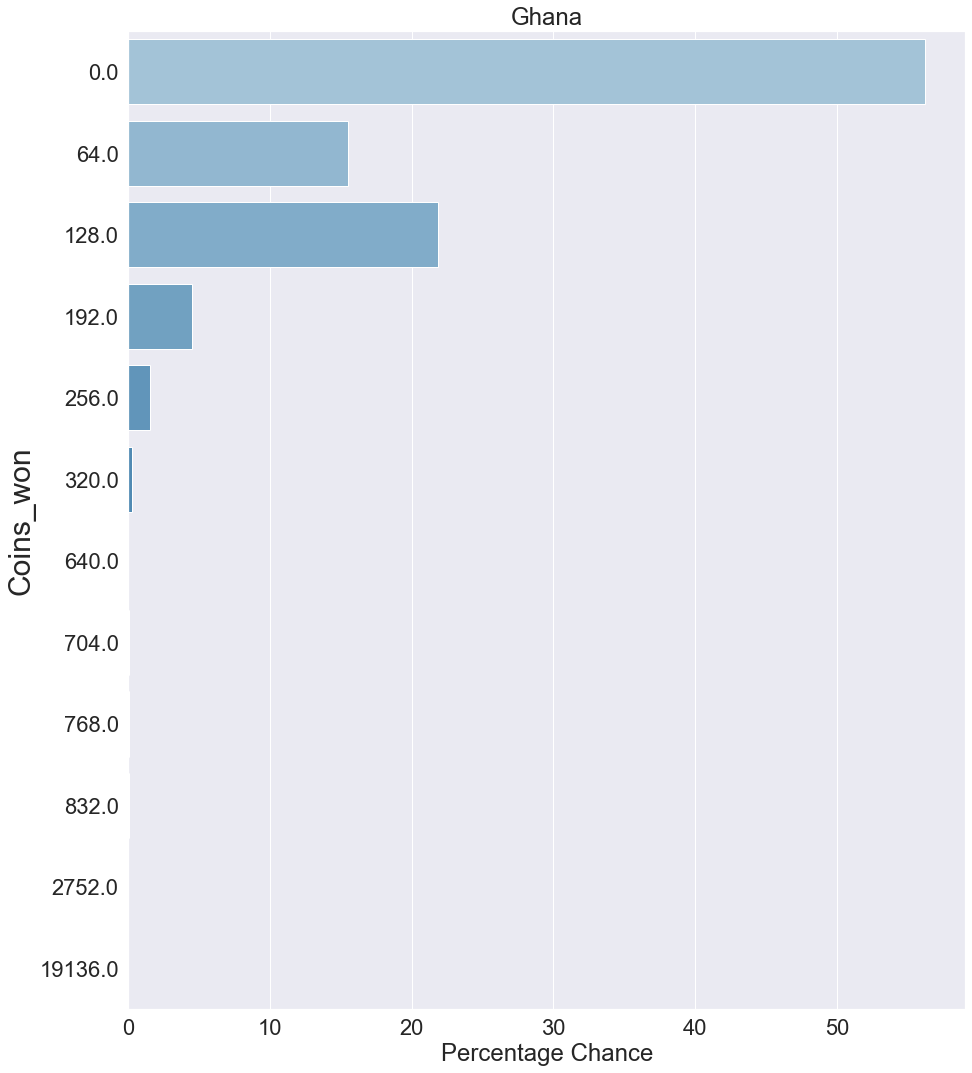

In [3]:
country = 'Ghana'

sns.set(font_scale=2)
plt.figure(figsize=(15,18))
sns.barplot(y=(df[df.country == country].groupby('coins_won').count()/150).index, 
            x=(df[df.country == country].groupby('coins_won').count()/150)['country'].values, palette="Blues_d", orient='h')

plt.title(country)
plt.xlabel('Percentage Chance')
plt.ylabel('Coins_won', fontsize=30)

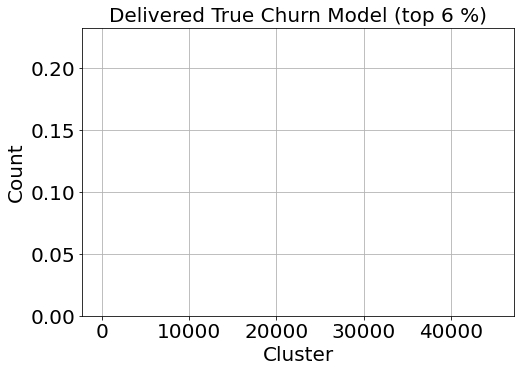

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar((df[df.country == 'Ecuador'].groupby('coins_won').count()/15000).index,(df[df.country == 'Ecuador'].groupby('coins_won').count()/15000).country.values)
plt.title('Delivered True Churn Model (top 6 %)', fontsize = 20)
plt.xlabel('Cluster', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

In [17]:
# df = df_tier
# df.head()

,result,country,tier,sim_no
0,A1,Netherlands,GROUP,0
1,A2,Senegal,GROUP,0
2,B1,England,GROUP,0
3,B2,Wales,GROUP,0
4,C1,Argentina,GROUP,0


# counts data Sankey

In [198]:
country = 'Ecuador'
group = 'A'
values = []

# prob exiting the groups
# prob of C1 or C2

df_group_1 = df[(df.country == country)&(df.result == group+'1')]
df_group_2 = df[(df.country == country)&(df.result == group+'2')]
values.append(N - (df_group_1.sim_no.nunique() + df_group_2.sim_no.nunique()))
values.append(df_group_1.sim_no.nunique())
values.append(df_group_2.sim_no.nunique())

# when country is C1, how likely are they to win
# of all the times a country is C1, how many times did they reach R16

df_R16_w_1 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_1.sim_no.unique()))]

values.append(df_R16_w_1.sim_no.nunique())
values.append(df_group_1.sim_no.nunique() - df_R16_w_1.sim_no.nunique())

# when country is C2, how likely are they to win
# of all the times a country is C2, how many times did they reach R16

df_R16_w_2 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_2.sim_no.unique()))]

values.append(df_R16_w_2.sim_no.nunique())
values.append(df_group_2.sim_no.nunique() - df_R16_w_2.sim_no.nunique())

# if they reach QF2, how likely are they to win

df_QF_w_1 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_1.sim_no.unique()))]

values.append(df_QF_w_1.sim_no.nunique())
values.append(df_R16_w_1.sim_no.nunique() - df_QF_w_1.sim_no.nunique())

# if they reach QF4, how likely are they to win
# they are now in the semis

df_QF_w_2 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_2.sim_no.unique()))]

values.append(df_QF_w_2.sim_no.nunique())
values.append(df_R16_w_2.sim_no.nunique() - df_QF_w_2.sim_no.nunique())

# if they reach SF1, how likely are they to win

df_SF_w_1 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_1.sim_no.unique()))]
values.append(df_SF_w_1.sim_no.nunique())
values.append(df_QF_w_1.sim_no.nunique() - df_SF_w_1.sim_no.nunique())

# if they reach SF2, how likely are they to win

df_SF_w_2 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_2.sim_no.unique()))]
values.append(df_SF_w_2.sim_no.nunique())
values.append(df_QF_w_2.sim_no.nunique() - df_SF_w_2.sim_no.nunique())

values.append(df[(df.country == country) & (df.tier == 'WINNER')].sim_no.nunique())
values.append(df[(df.country == country) & (df.tier == 'SECOND')].sim_no.nunique())
values.append(df[(df.country == country) & (df.tier == 'THIRD')].sim_no.nunique())
values.append(df[(df.country == country) & (df.tier == 'FOURTH')].sim_no.nunique())

node_label = ["GROUPS", "KO", "C1", "C2", "QF2", "QF4", "SF1", "SF2", "FINAL", "RUNNER_UP", "FIRST", "SECOND", "THIRD", "FOURTH"]
node_dict = {y:x for x, y in enumerate(node_label)}

source = ['GROUPS','GROUPS','GROUPS','C1', 'C1', 'C2', 'C2', 'QF2', 'QF2','QF4', 'QF4','SF1',  'SF1',      'SF2',  'SF2',       'FINAL', 'FINAL',  'RUNNER_UP','RUNNER_UP']
target = ['KO',    'C1',    'C2',    'QF2','KO', 'QF4','KO', 'SF1', 'KO', 'SF2', 'KO', 'FINAL','RUNNER_UP','FINAL','RUNNER_UP', 'FIRST', 'SECOND', 'THIRD',    'FOURTH'] 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_counts_'+country, 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [521]:
for country in countries:

    print ("%.3f"%(len(df_tier[(df_tier.country == country)&(df_tier.tier == 'R16')])/len(df_tier[df_tier.tier == 'R16'])*0.0), country)

0.094
0.066
0.092
0.065
0.055
0.074
0.090
0.058
0.053
0.050
0.038
0.016
0.037
0.028
0.018
0.007
0.017
0.018
0.026
0.005
0.007
0.017
0.008
0.002
0.004
0.003
0.007
0.001
0.039
0.006
0.001
0.000


In [517]:
for country in countries:

    print ("%.3f"%(len(df_tier[(df_tier.country == country)&(df_tier.tier == 'WINNER')])/len(df_tier[df_tier.tier == 'WINNER'])), country)

0.271 Brazil
0.062 Belgium
0.225 Argentina
0.068 France
0.029 England
0.079 Spain
0.090 Netherlands
0.040 Portugal
0.046 Denmark
0.025 Germany
0.011 Croatia
0.004 Mexico
0.016 Uruguay
0.006 Switzerland
0.003 United_States
0.000 Senegal
0.002 Wales
0.003 Iran
0.006 Serbia
0.000 Morocco
0.000 Japan
0.005 Poland
0.001 Korea
0.000 Tunisia
0.000 Costa_Rica
0.000 Australia
0.000 Canada
0.000 Cameroon
0.008 Ecuador
0.000 Qatar
0.000 Saudi_Arabia
0.000 Ghana


In [543]:

results = []

for country in countries:

    results.append(len(df_tier[(df_tier.country == country)&(df_tier.tier == 'WINNER')])/len(df_tier[df_tier.tier == 'WINNER']))

In [544]:
results

[0.2708,
 0.0624,
 0.2252,
 0.0684,
 0.029,
 0.0786,
 0.0896,
 0.0404,
 0.046,
 0.025,
 0.0106,
 0.0038,
 0.0156,
 0.006,
 0.003,
 0.0002,
 0.002,
 0.003,
 0.0062,
 0.0002,
 0.0002,
 0.0046,
 0.0008,
 0.0002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008,
 0.0002,
 0.0,
 0.0]

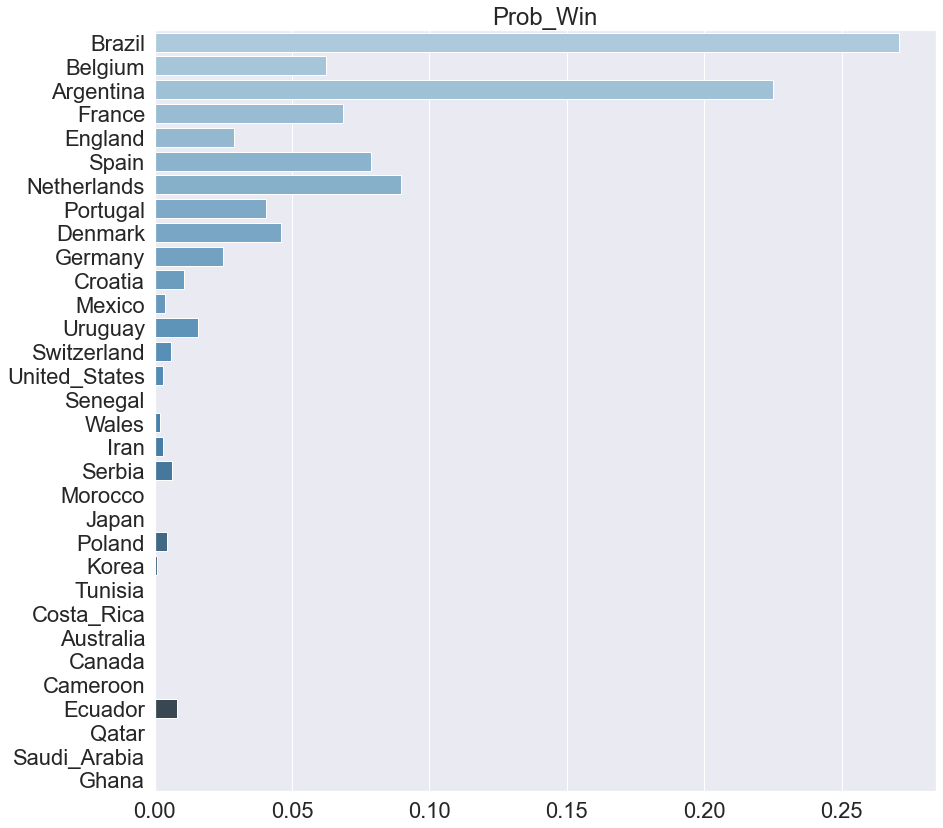

In [519]:
sns.set(font_scale=2)
plt.figure(figsize=(14,14))
plt.title("Prob_Win")
ax = sns.barplot(y=countries, x=results, palette="Blues_d", orient='h')

In [537]:
countries_interest

['Brazil',
 'Argentina',
 'England',
 'Netherlands',
 'Croatia',
 'Uruguay',
 'Wales',
 'Ecuador',
 'Qatar']

In [536]:
results

[0.9578]

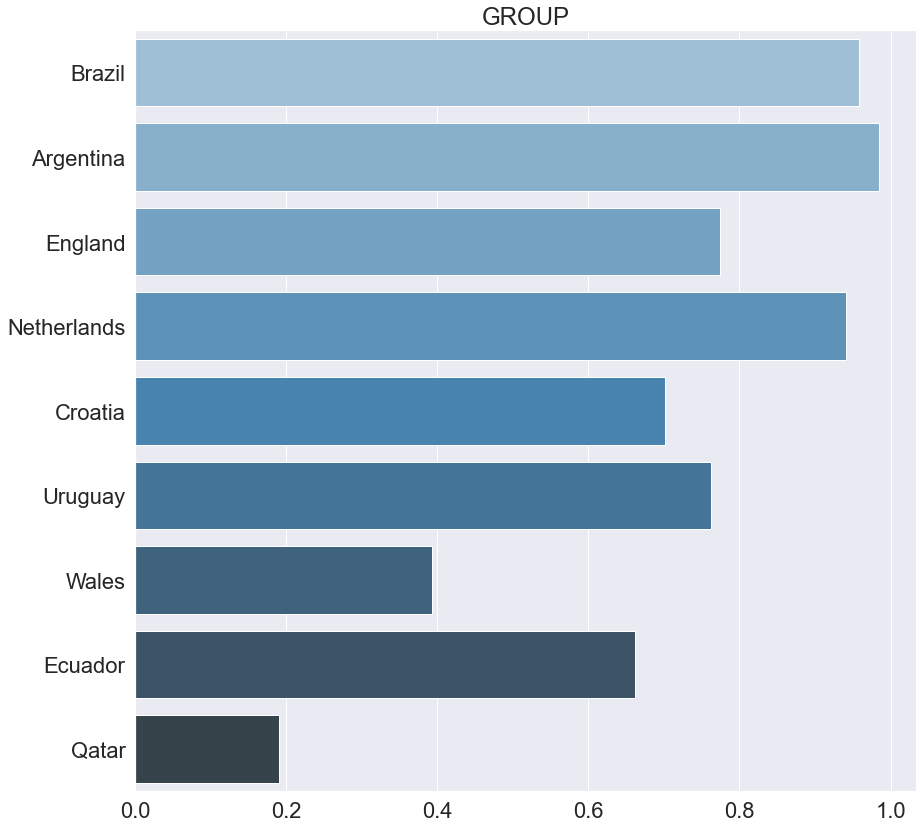

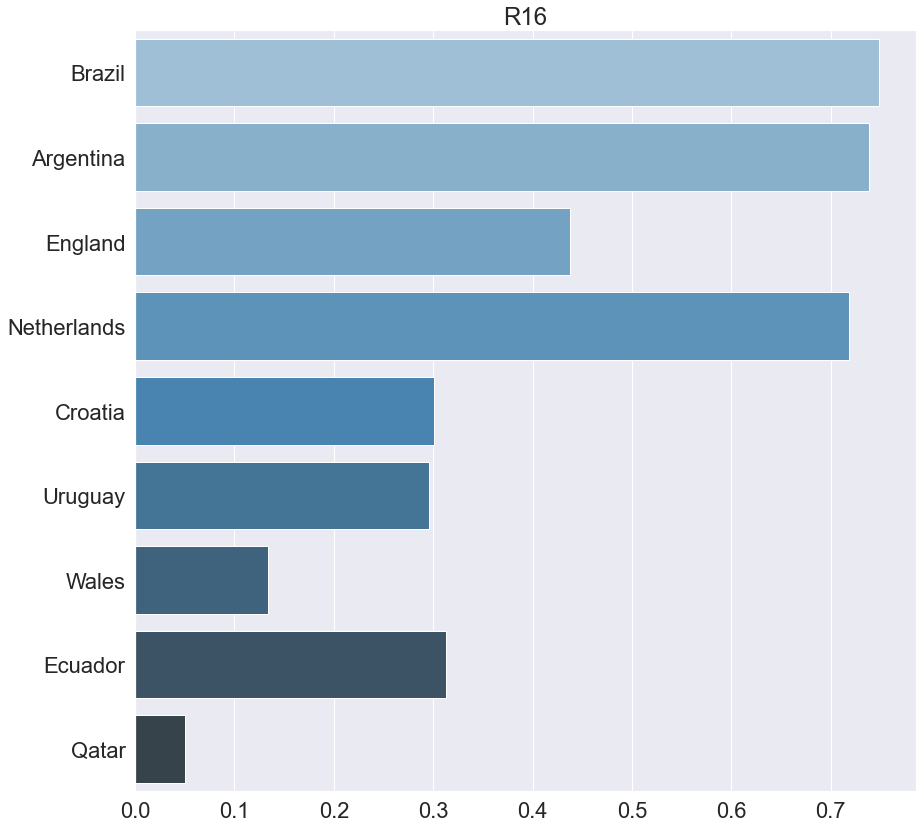

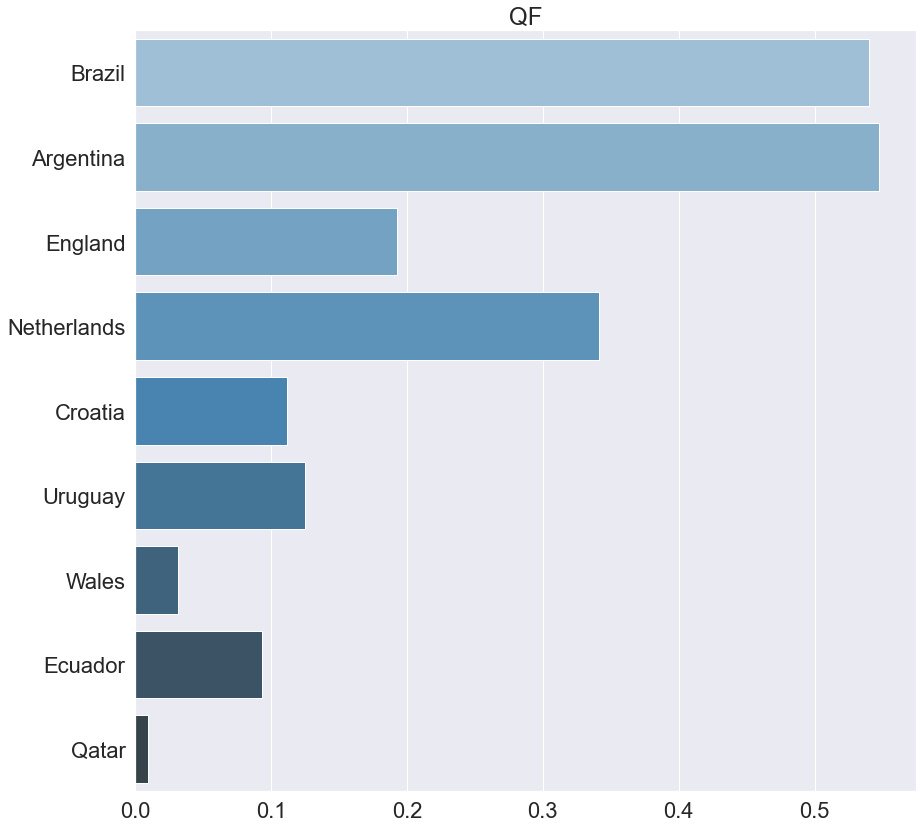

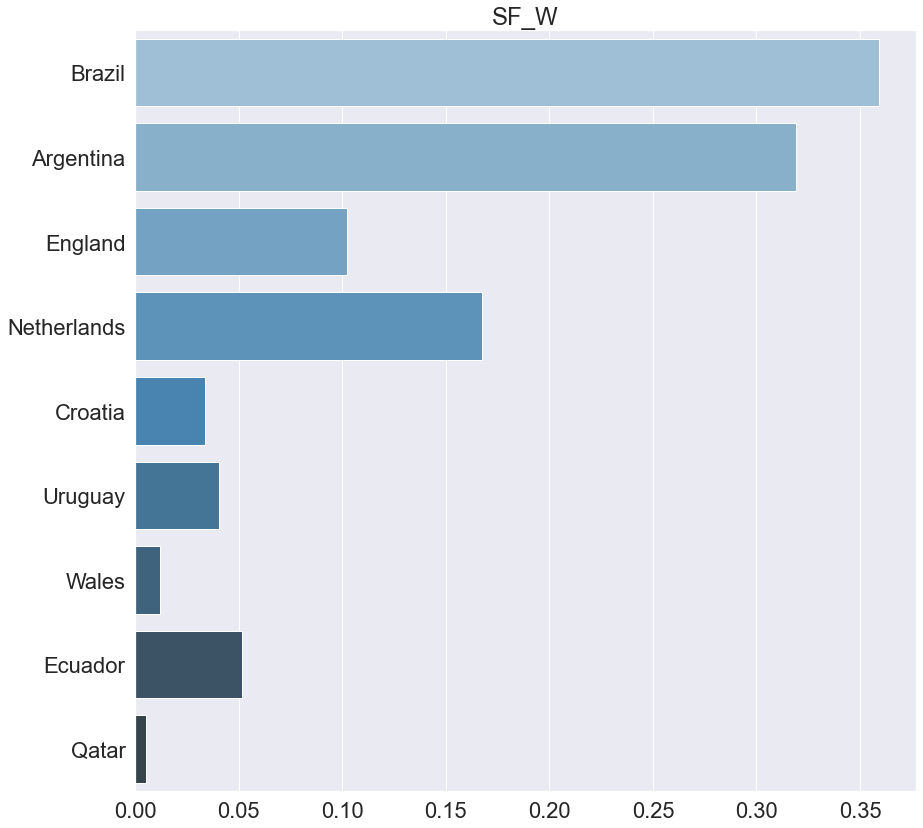

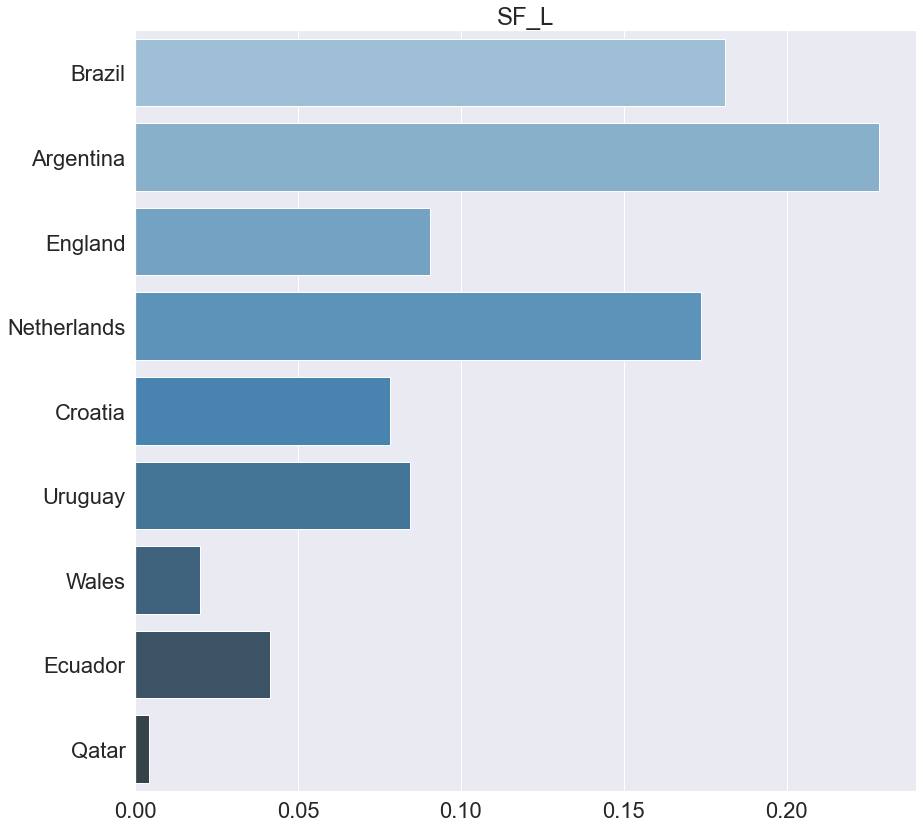

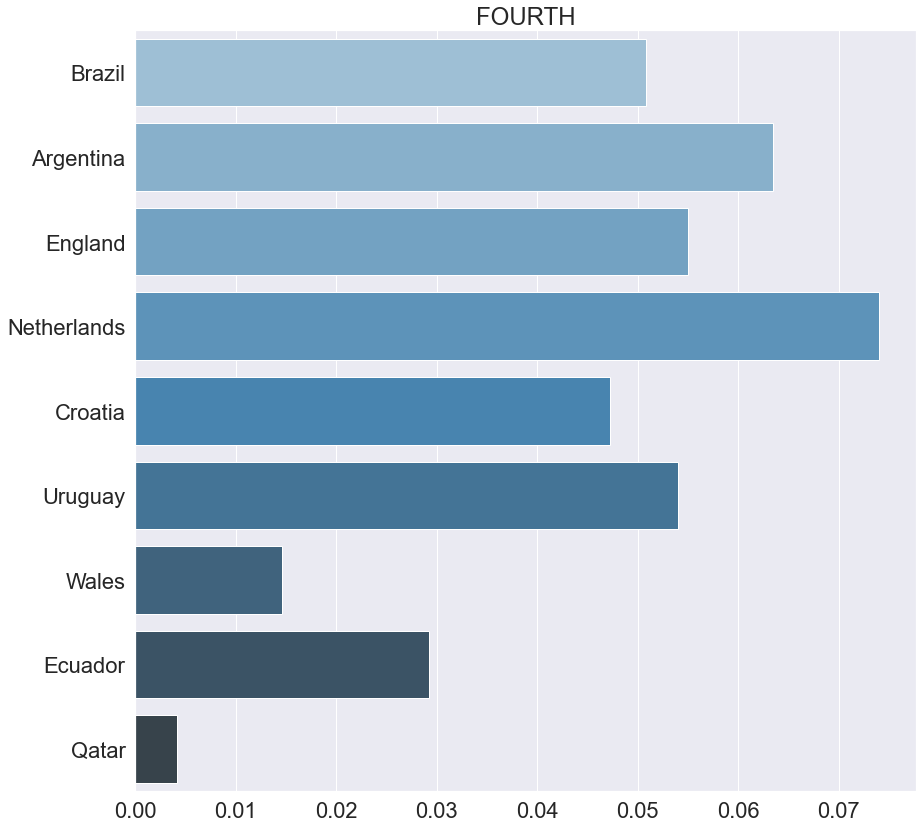

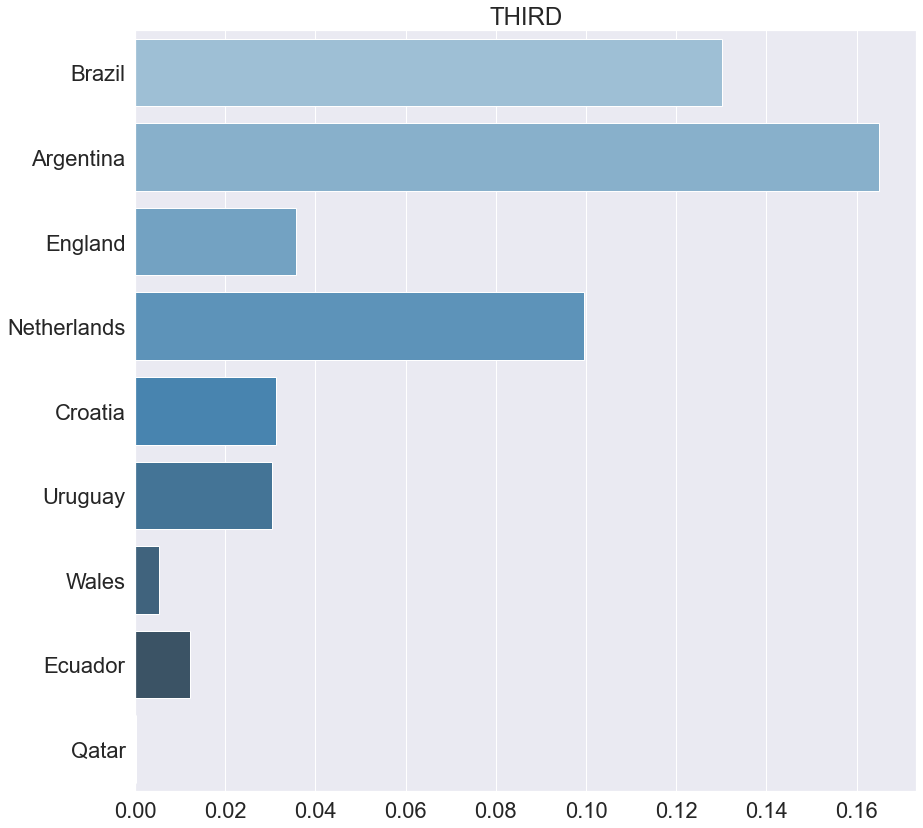

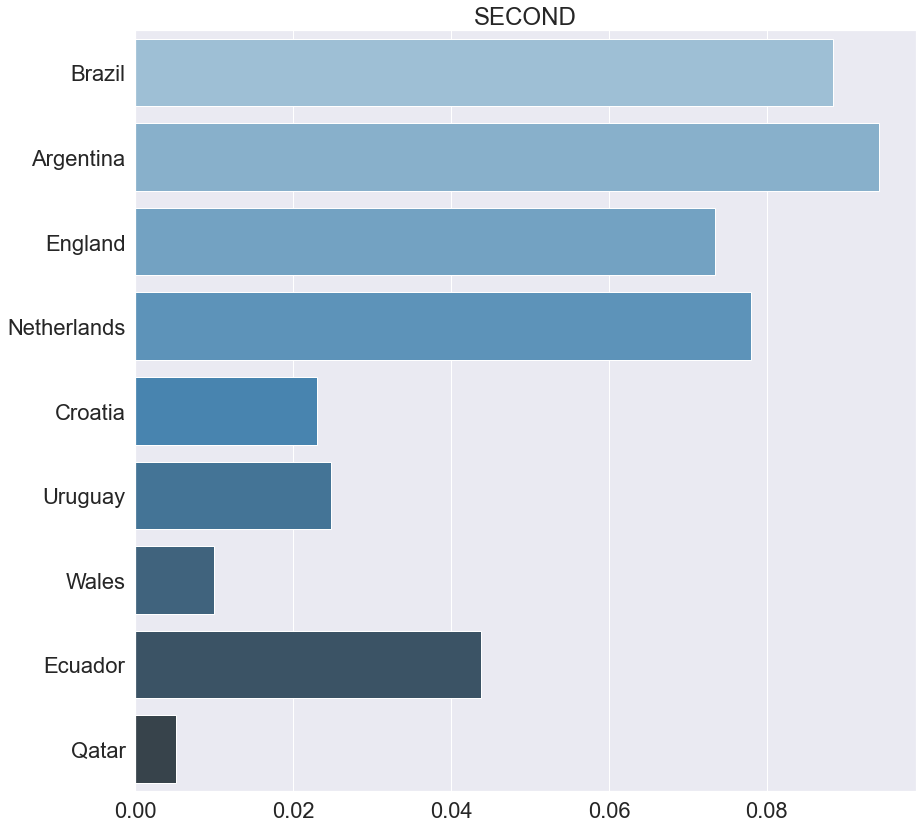

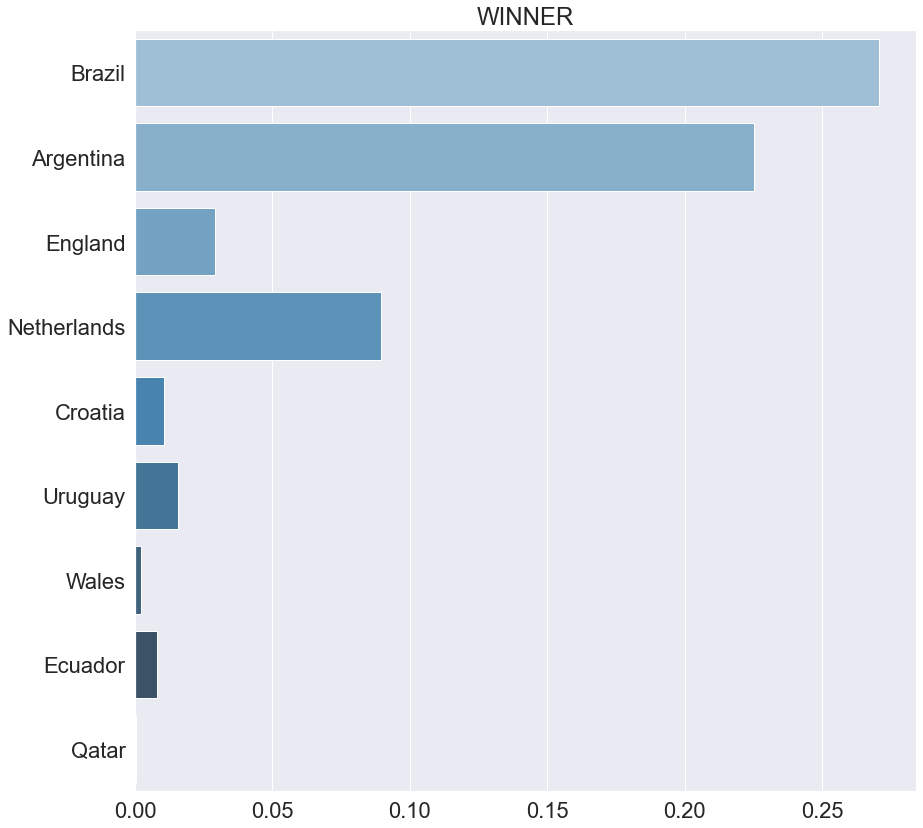

In [541]:
tier_results = []
for tier_name in tier_name_list:
    results = []
    for country in countries_interest:

        results.append((df_tier[(df_tier.country == country)&(df_tier.tier == tier_name)].sim_no.nunique())/(5000))
    tier_results.append(results)
    sns.set(font_scale=2)
    # imp = df.groupby('country').median().sort_values(by='coins_won',ascending=False)
    plt.figure(figsize=(14,14))
    plt.title(tier_name)
    ax = sns.barplot(y=countries_interest, x=results, palette="Blues_d", orient='h')

In [ ]:
churn_rate = pd.pivot_table(df2[(df2.Percentile_class <= 15) & 
           (df2.Percentile_digi_class <= 15)], index=['Percentile_class','Percentile_digi_class'], aggfunc='mean').CHURN.unstack()

fig, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(churn_rate, annot=True)

In [563]:
# tier_results = []
# for tier_name in tier_name_list:
#     results = []
#     for country in countries:

#         results.append((df_tier[(df_tier.country == country)&(df_tier.tier == tier_name)].sim_no.nunique())/(5000))
#     tier_results.append(results)

# df_cm = pd.DataFrame(tier_results, index = tier_name_list, columns = countries)

# plt.figure(figsize = (17,17))
# plt.title('World_cup_progress')
# sns.heatmap(df_cm, annot=True)
# # plt.xlabel(feat1)
# # plt.ylabel(feat2)

In [567]:
tier_results = []
for country in countries:
    results = []
    for tier_name in tier_name_list:

        results.append((df_tier[(df_tier.country == country)&(df_tier.tier == tier_name)].sim_no.nunique())/(5000))
    tier_results.append(results)

<AxesSubplot:title={'center':'World_cup_progress'}>

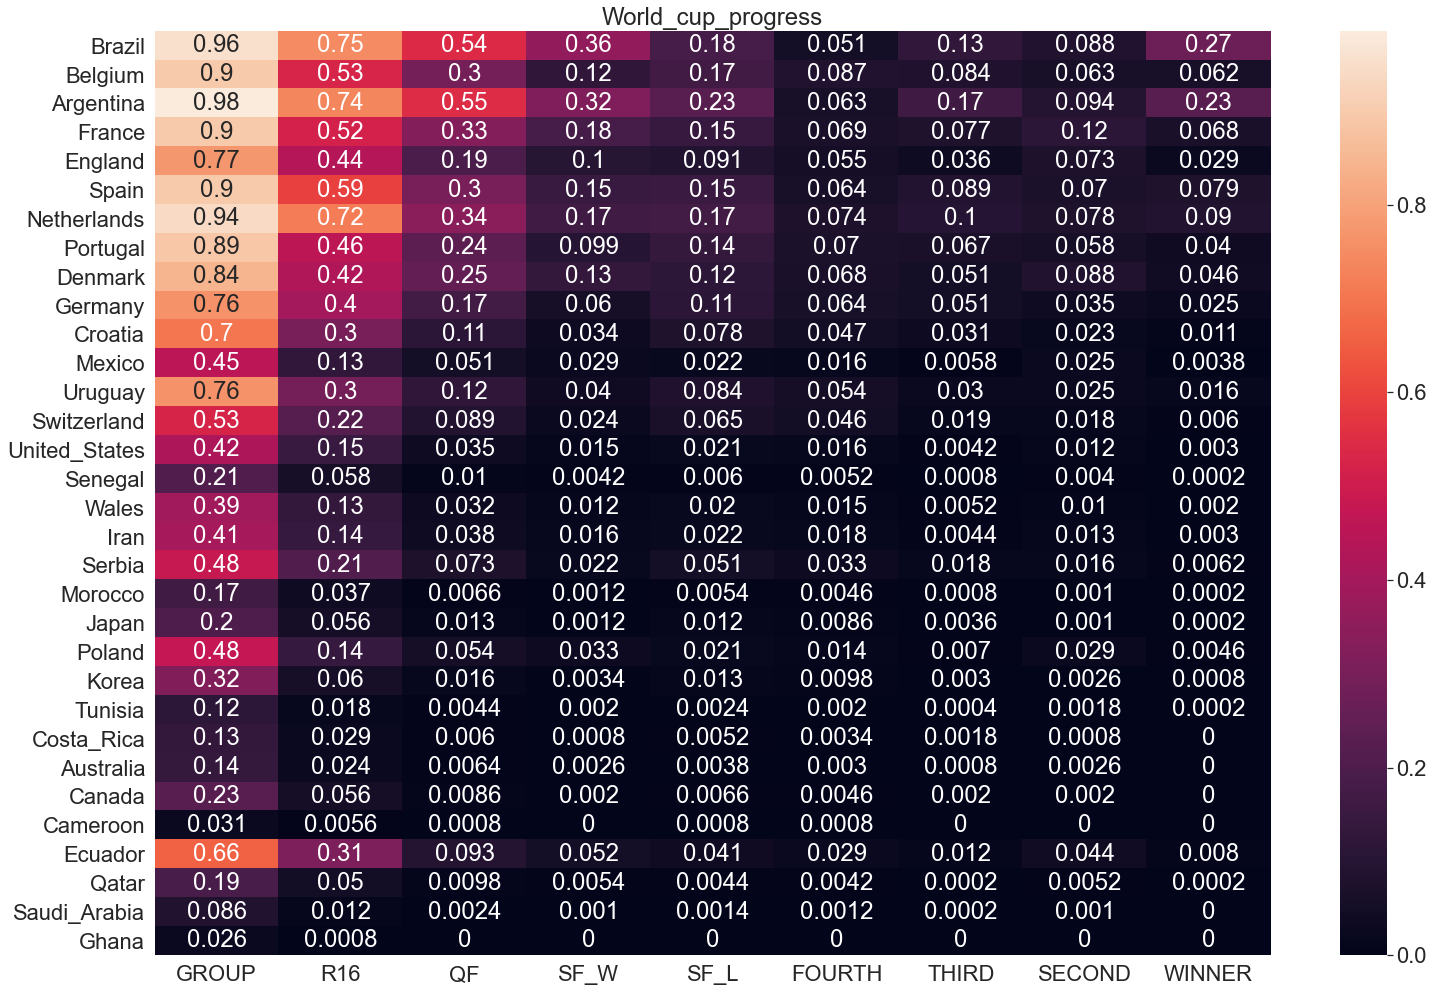

In [568]:
df_cm = pd.DataFrame(tier_results, index = countries, columns = tier_name_list)

plt.figure(figsize = (25,17))
plt.title('World_cup_progress')
sns.heatmap(df_cm, annot=True)
# plt.xlabel(feat1)
# plt.ylabel(feat2)

In [504]:
country = countries[4]
print (country)
print ('GROUP ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'GROUP')].sim_no.nunique())/(5000)))
print ('R16   ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'R16')].sim_no.nunique())/(5000)))
print ('QF    ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'QF')].sim_no.nunique())/(5000)))
print ('SF_L  ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'SF_L')].sim_no.nunique())/(5000)))
print ('SF_W  ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'SF_W')].sim_no.nunique())/(5000)))
print ('FOURTH', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'FOURTH')].sim_no.nunique())/(5000)))
print ('THIRD ', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'THIRD')].sim_no.nunique())/(5000)))
print ('SECOND', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'SECOND')].sim_no.nunique())/(5000)))
print ('WINNER', "%.3f"%((df_tier[(df_tier.country == country)&(df_tier.tier == 'WINNER')].sim_no.nunique())/(5000)))

England
GROUP  0.774
R16    0.438
QF     0.193
SF_L   0.091
SF_W   0.102
FOURTH 0.055
THIRD  0.036
SECOND 0.073
WINNER 0.029


<ipython-input-514-1fde6303b779>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,14))


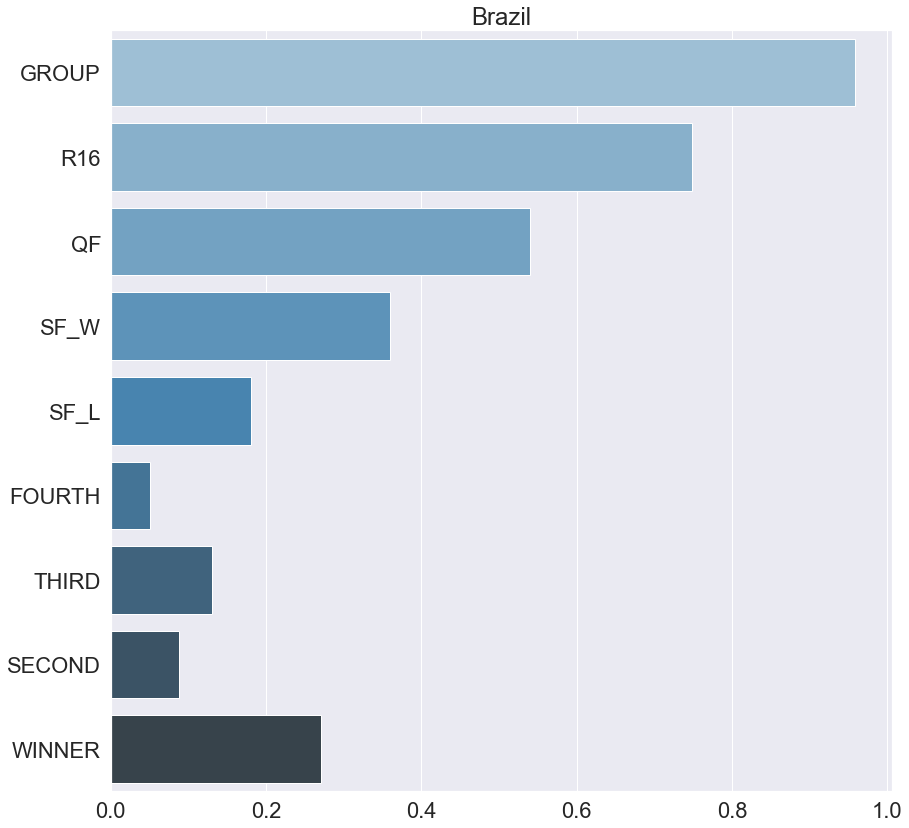

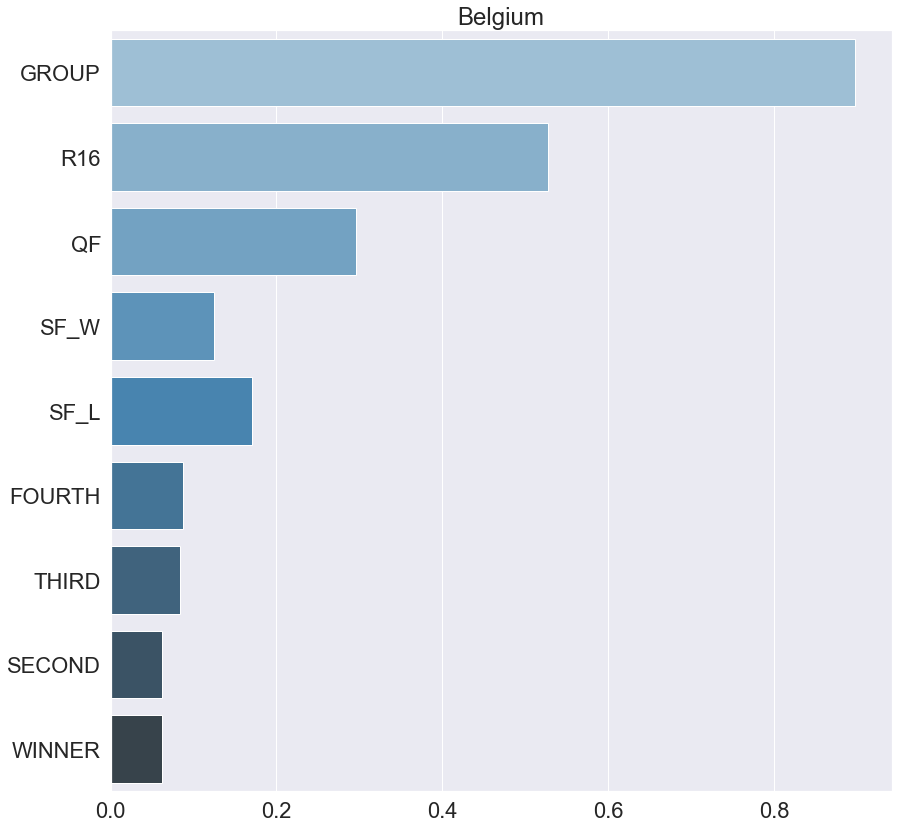

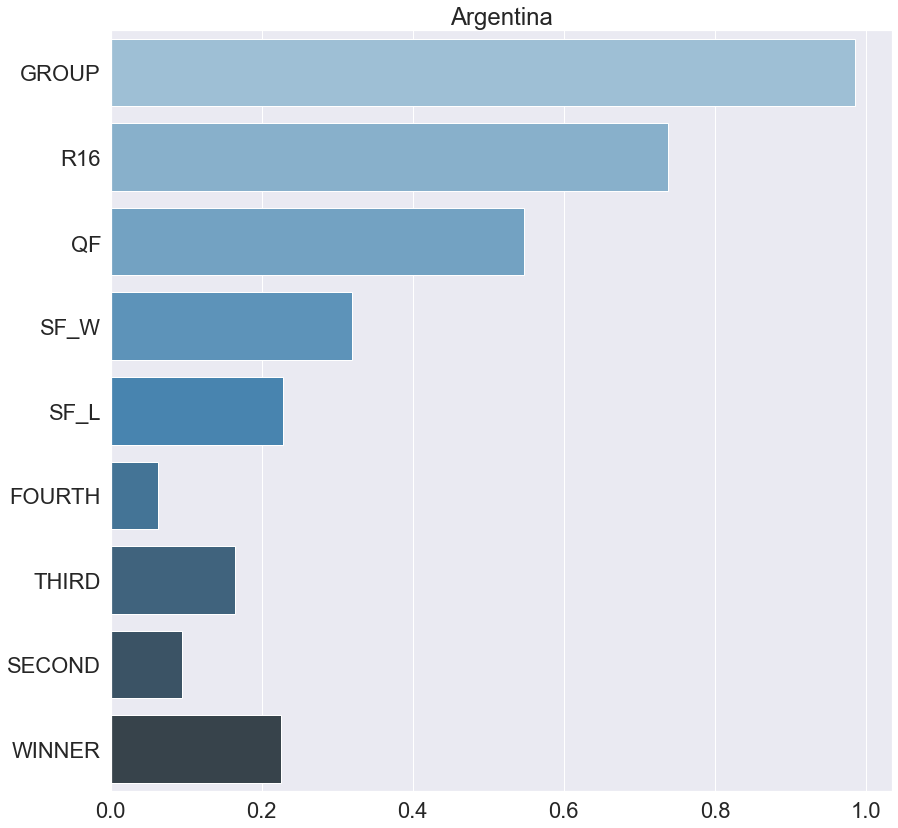

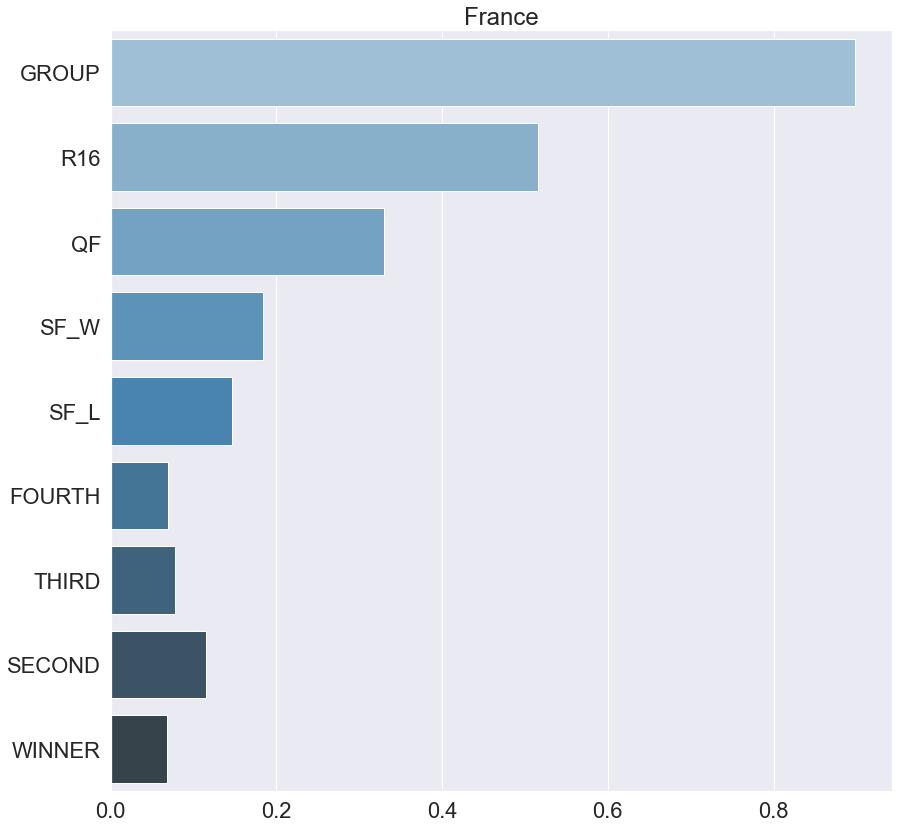

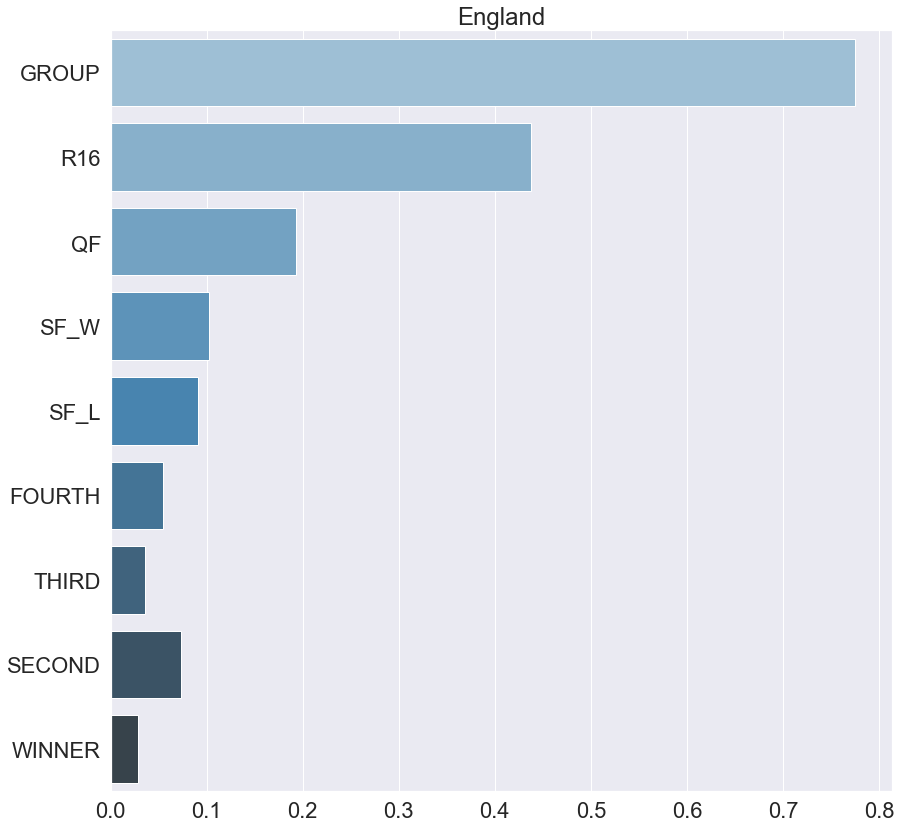

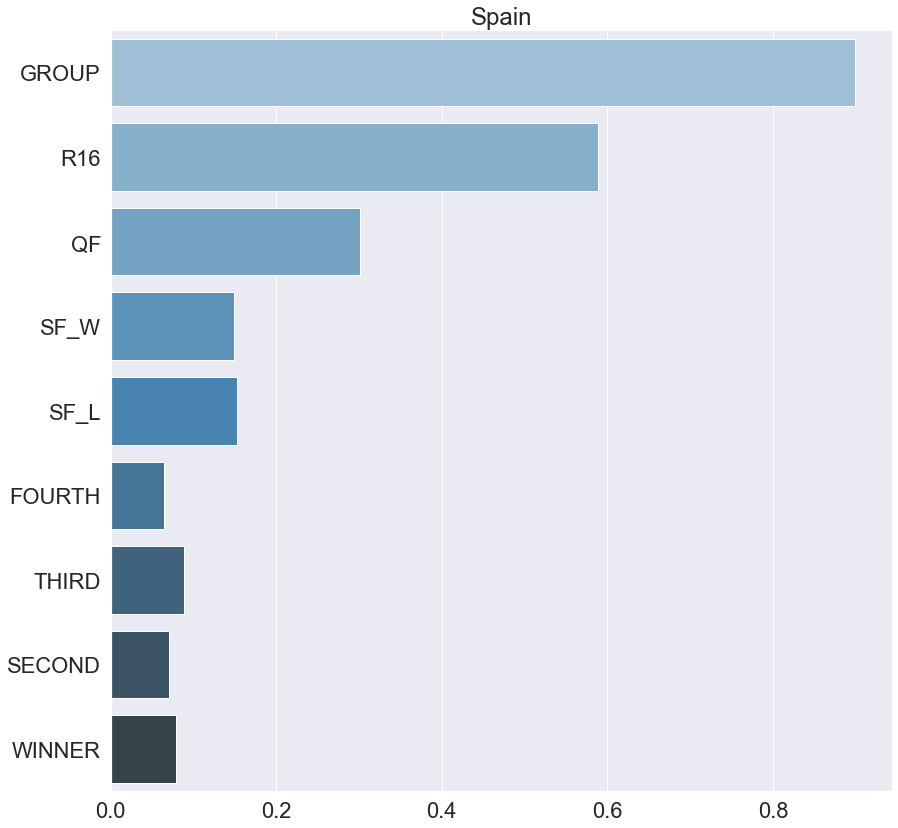

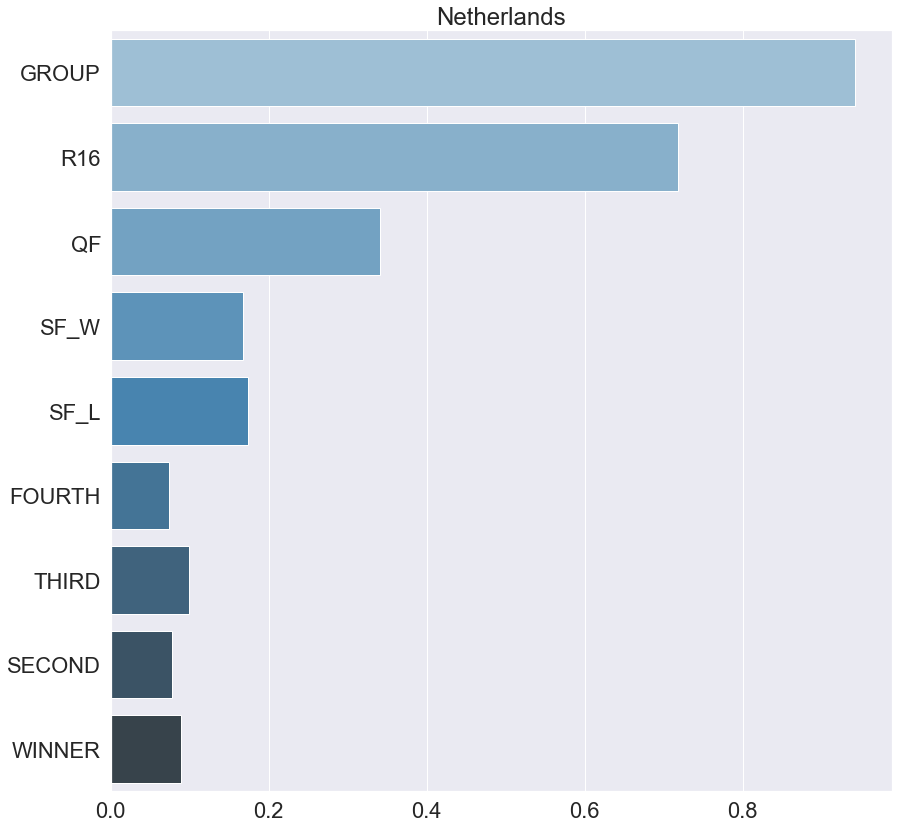

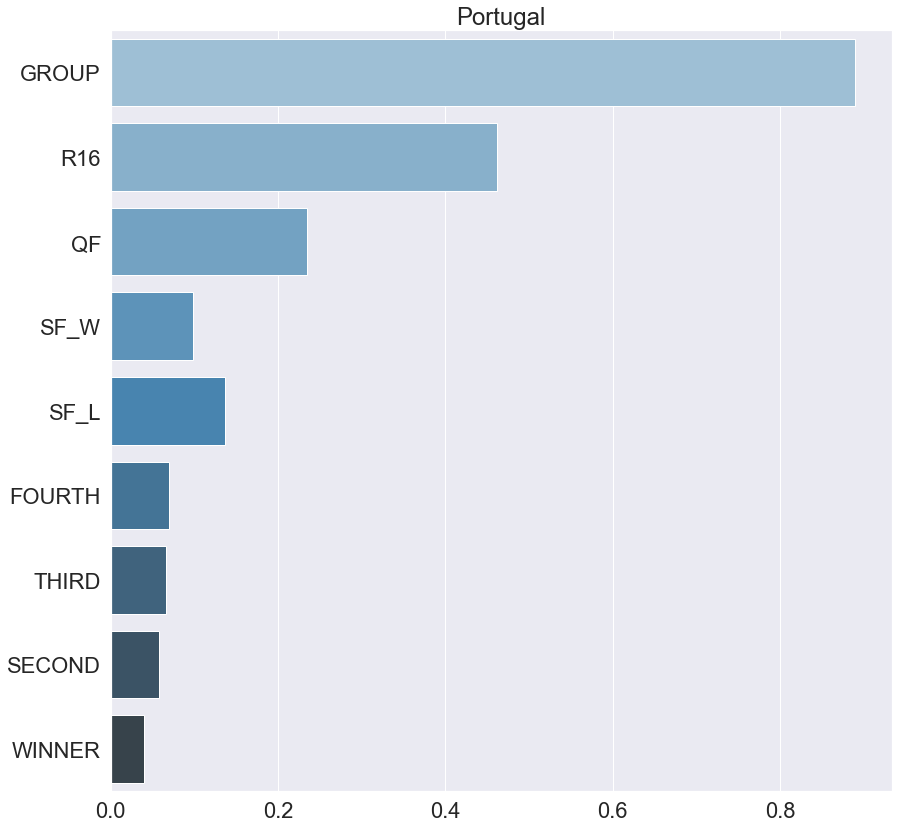

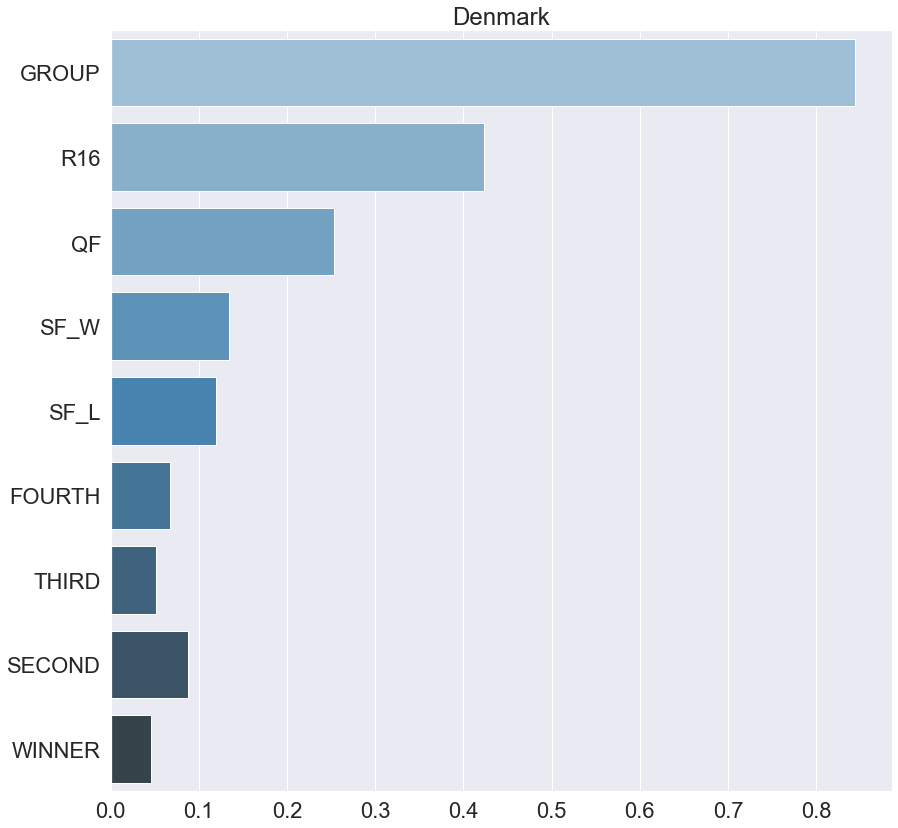

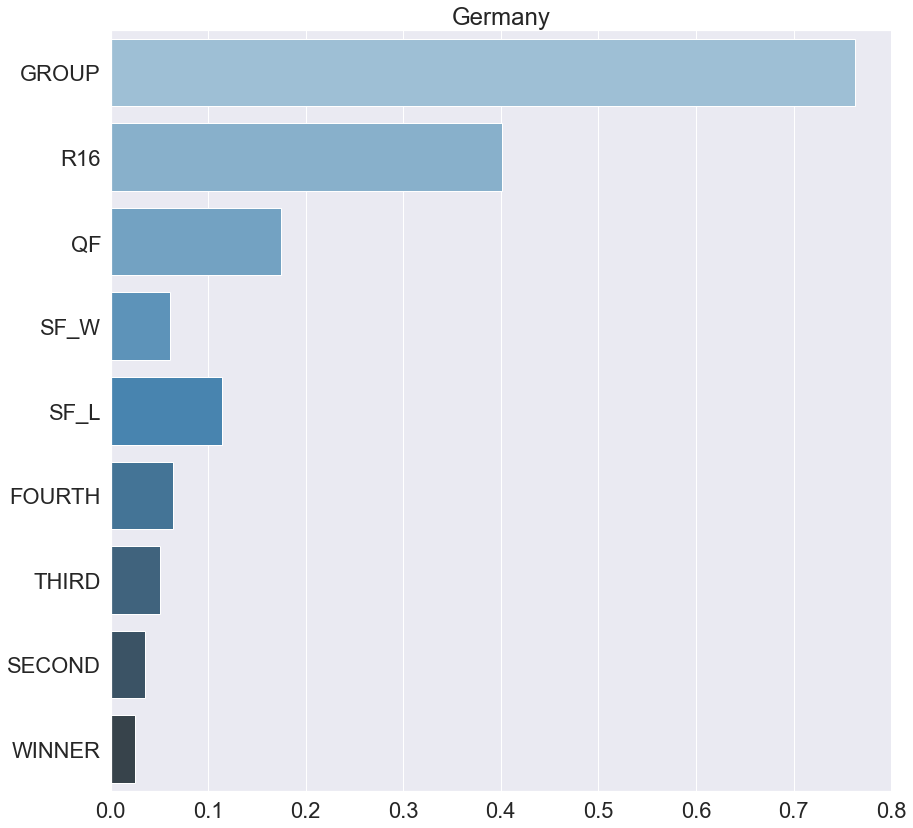

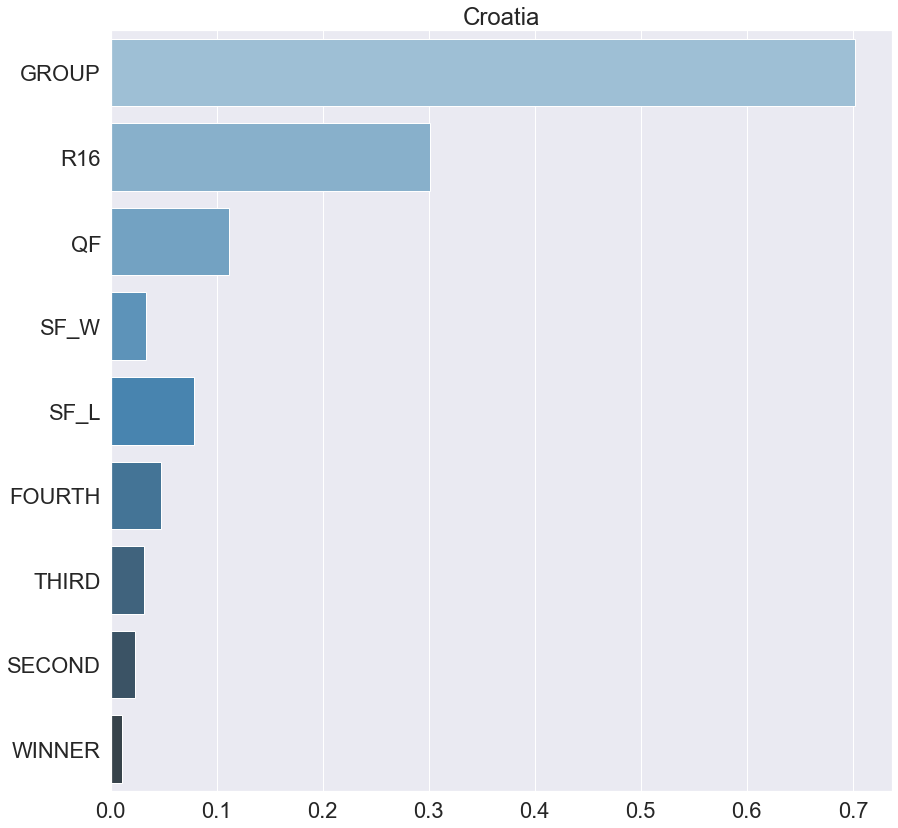

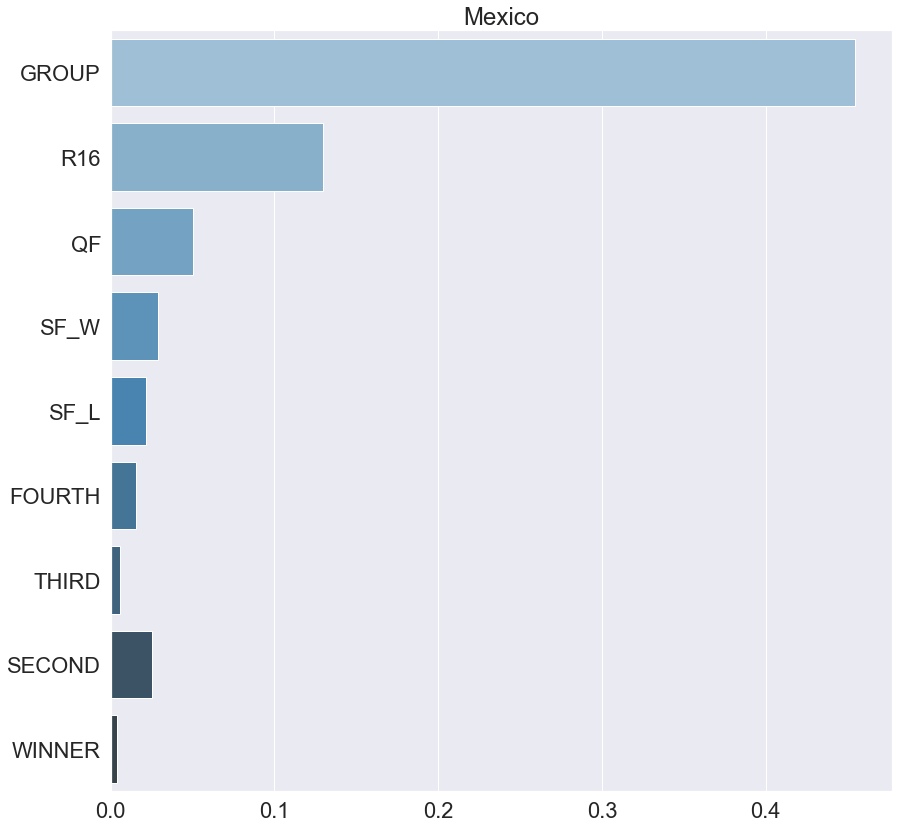

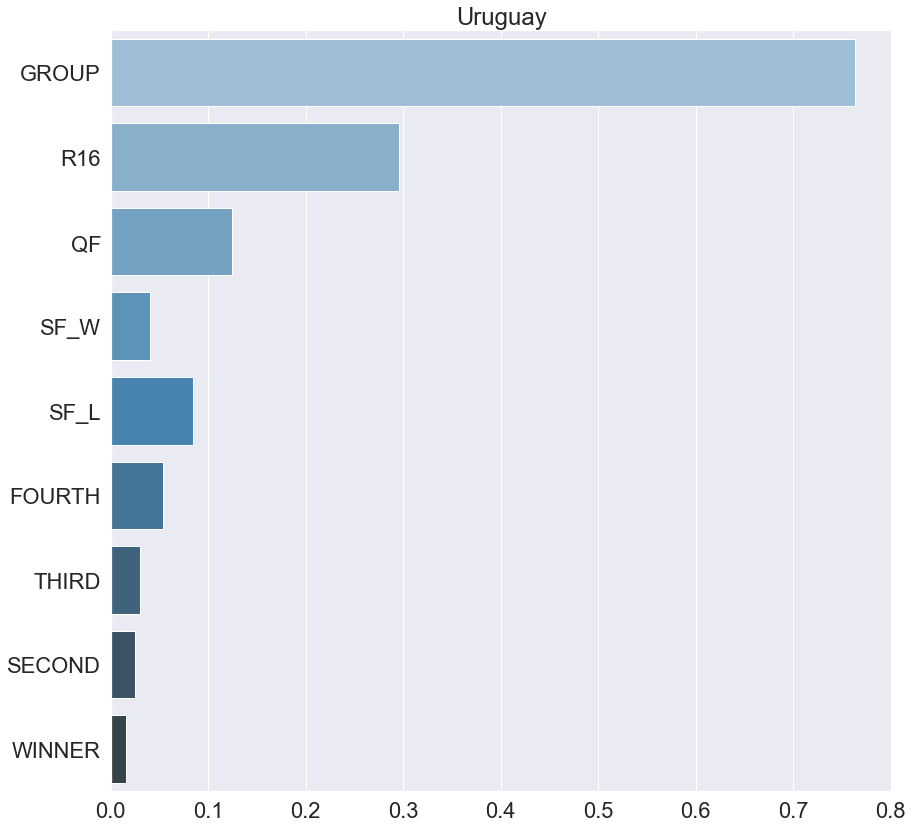

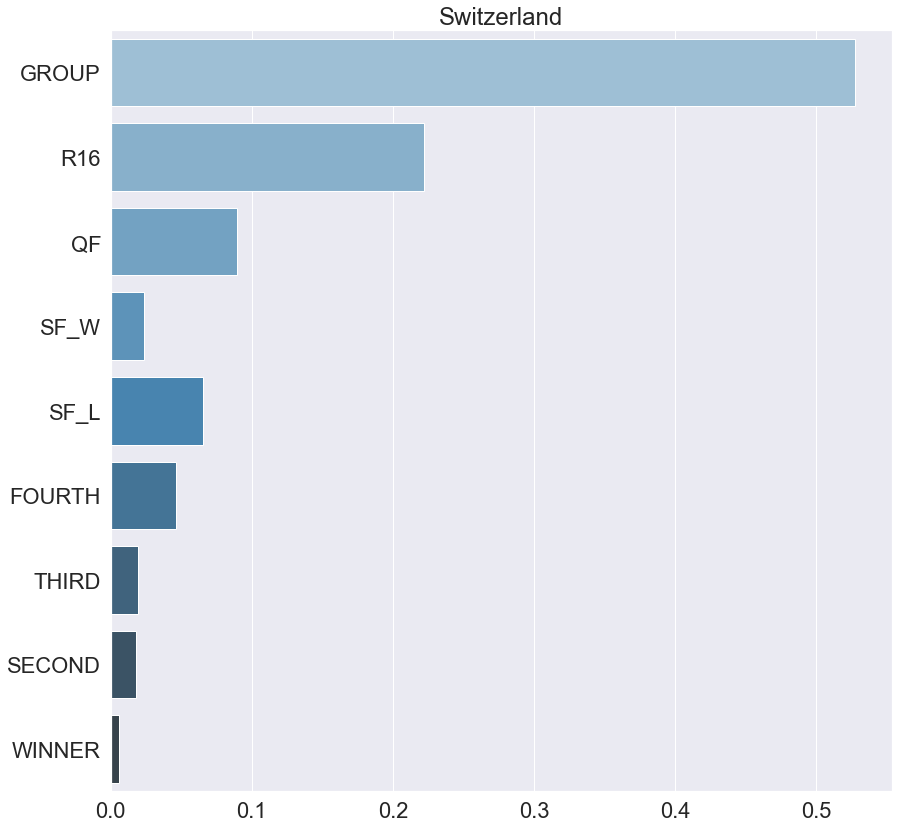

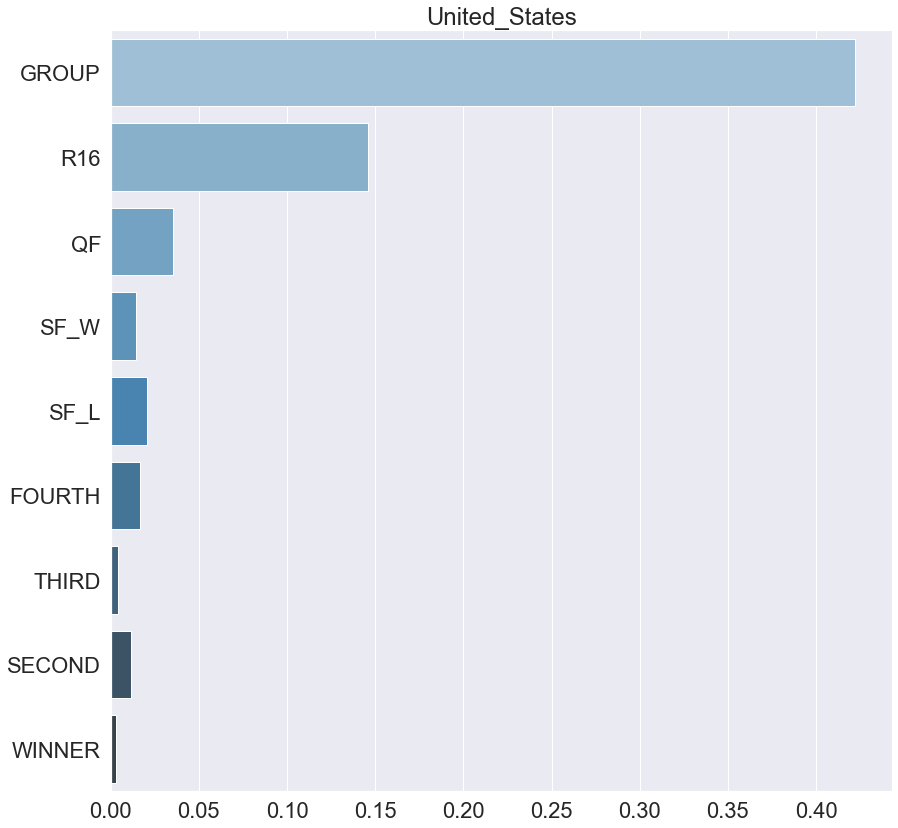

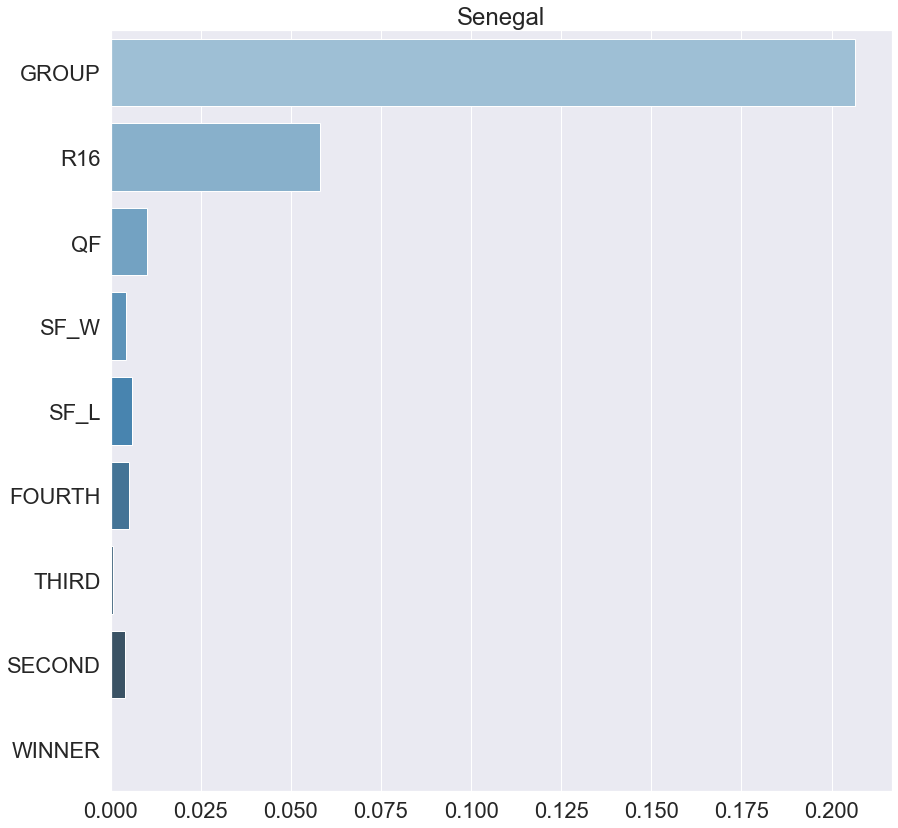

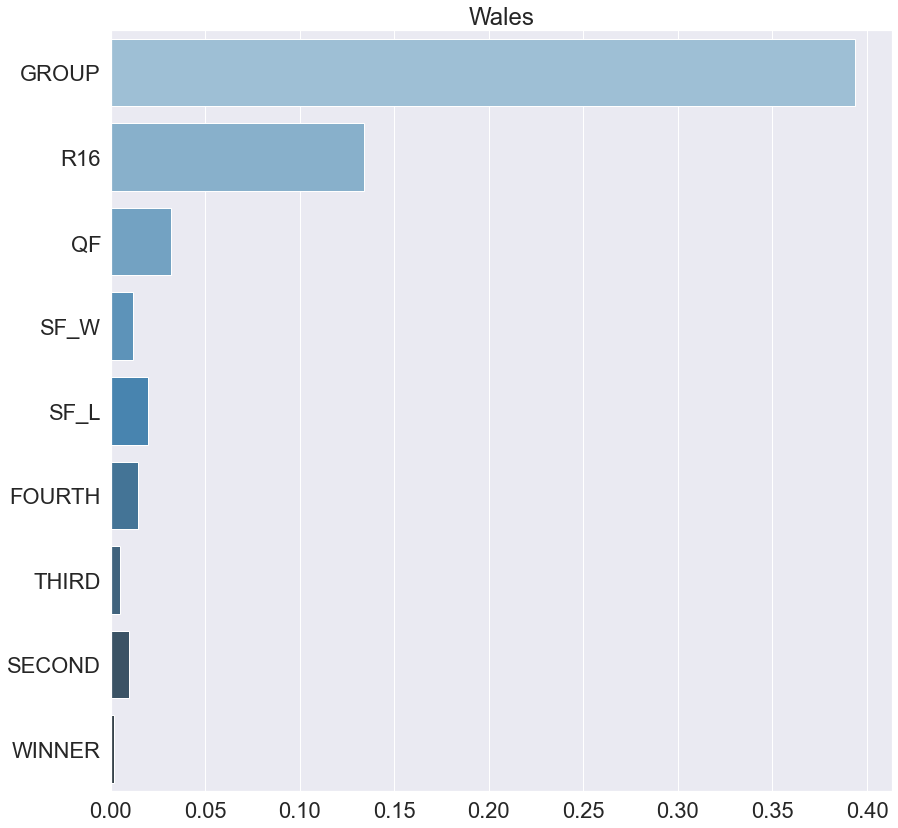

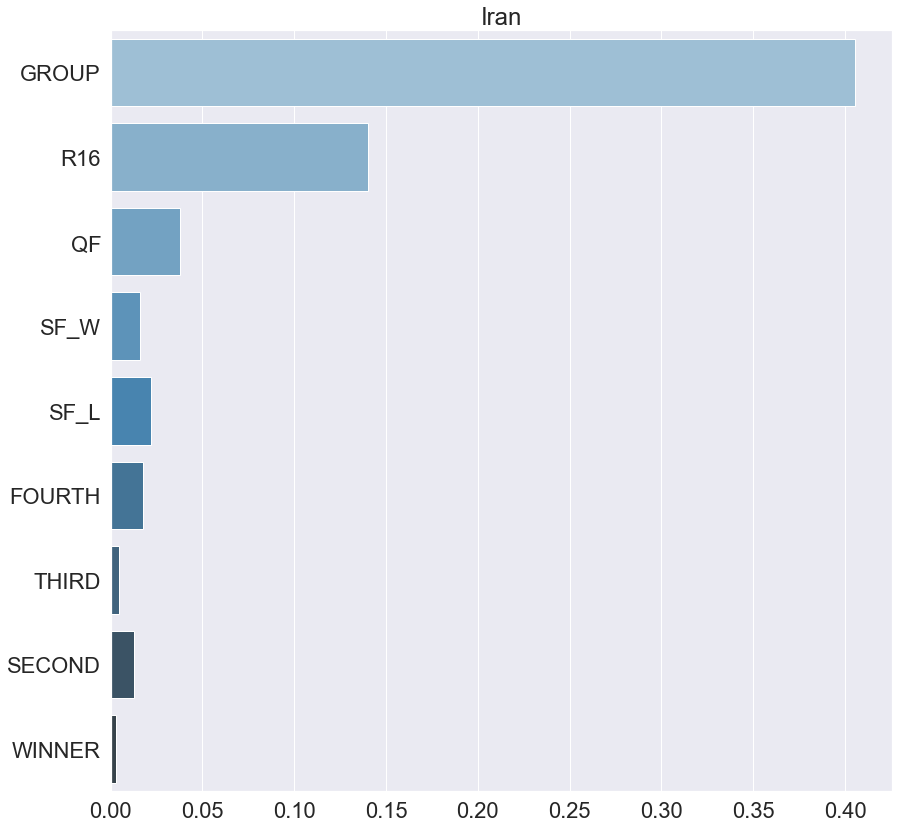

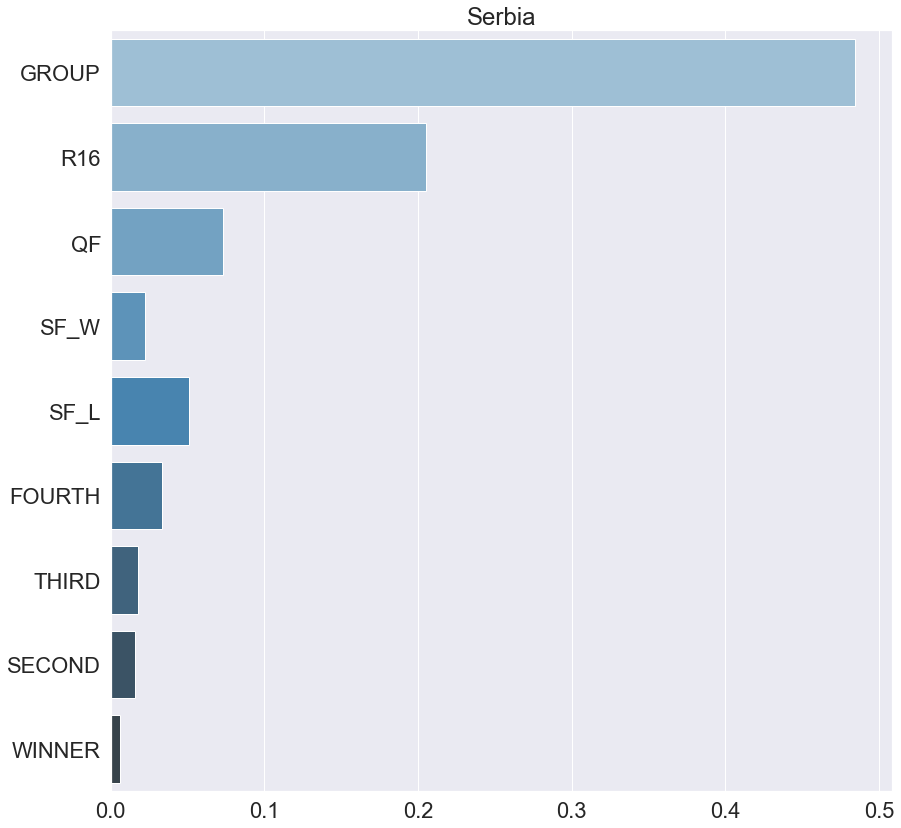

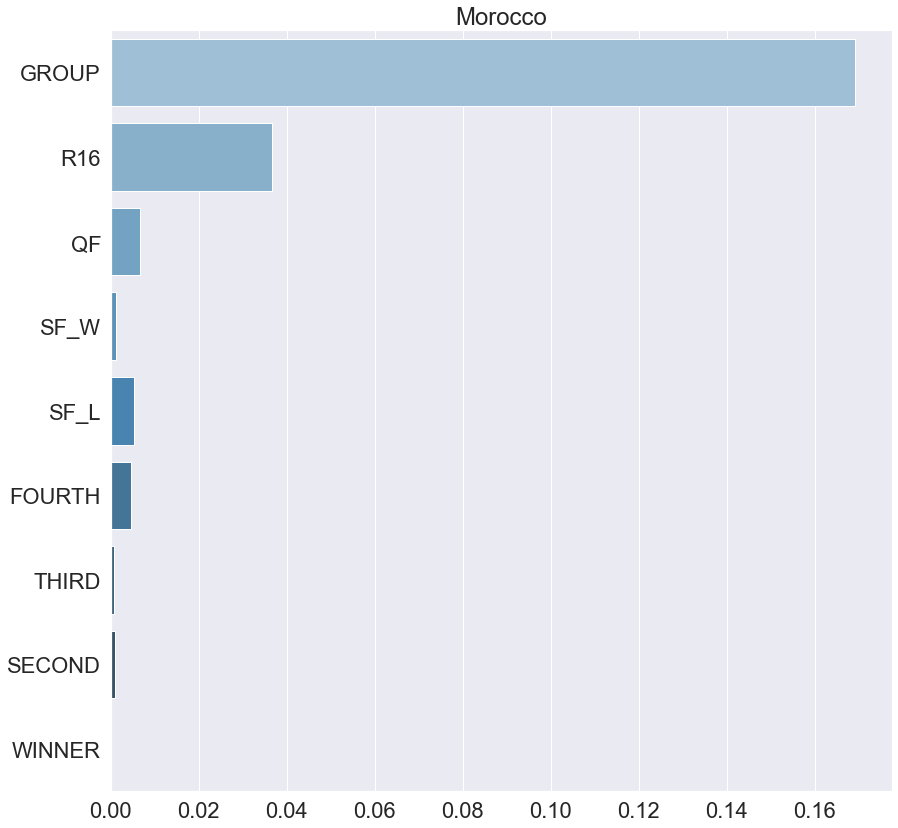

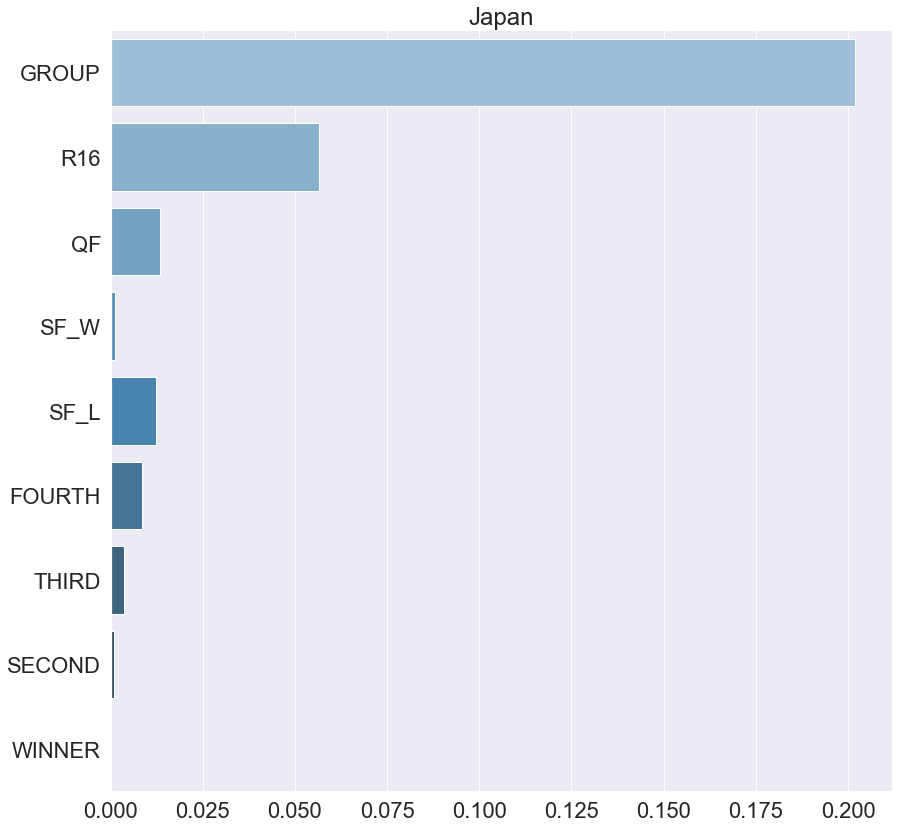

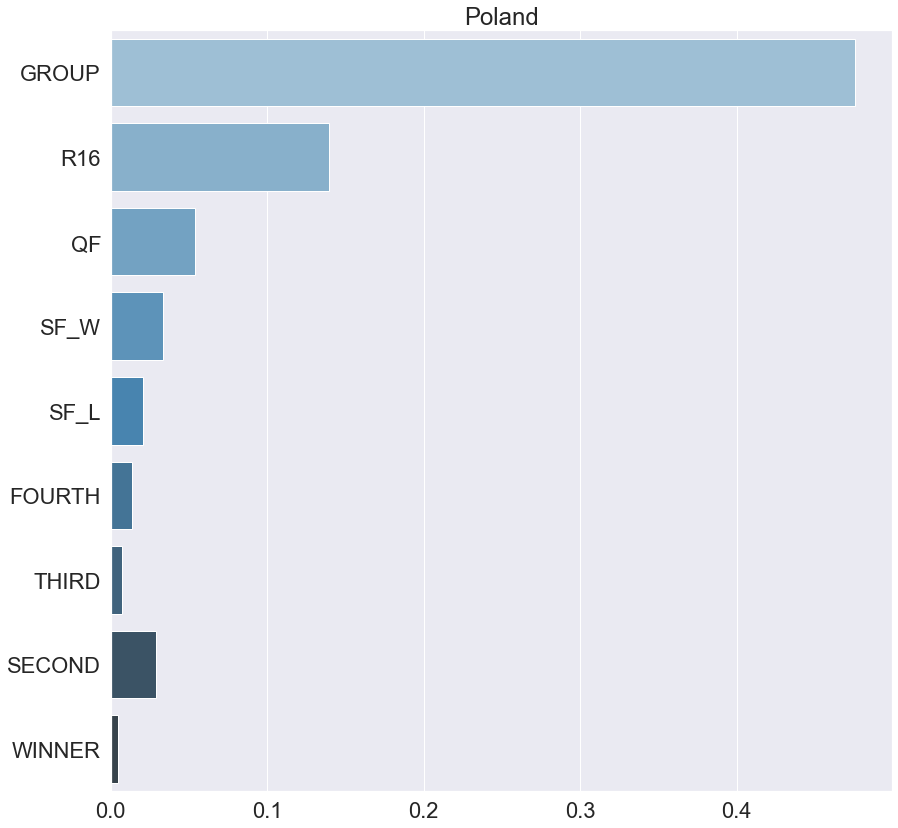

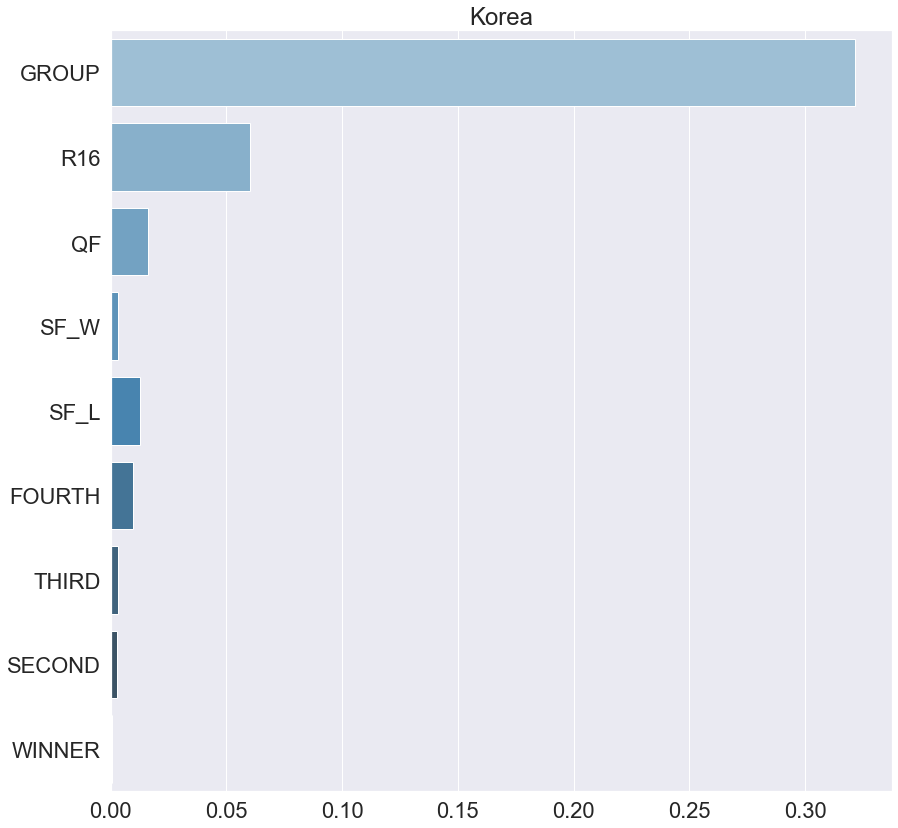

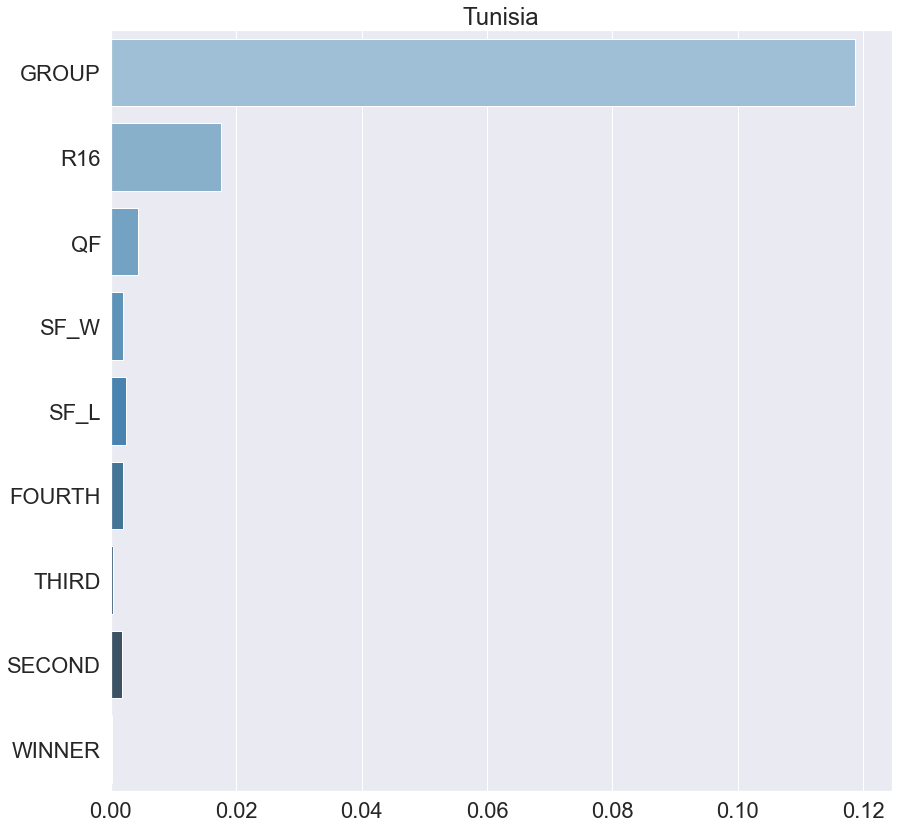

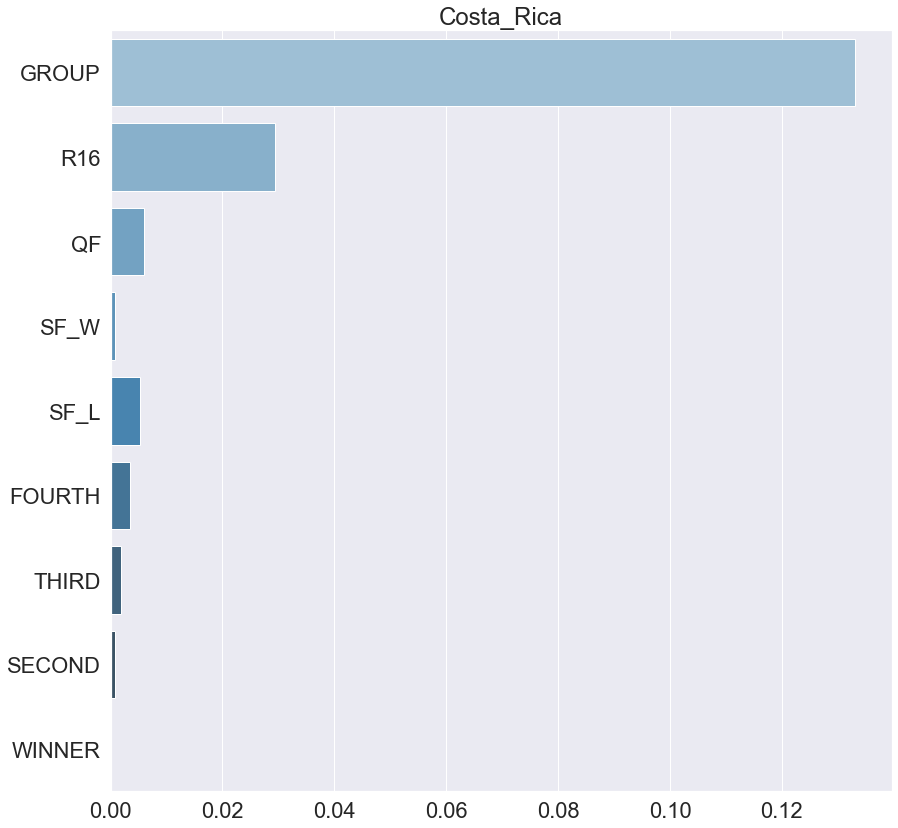

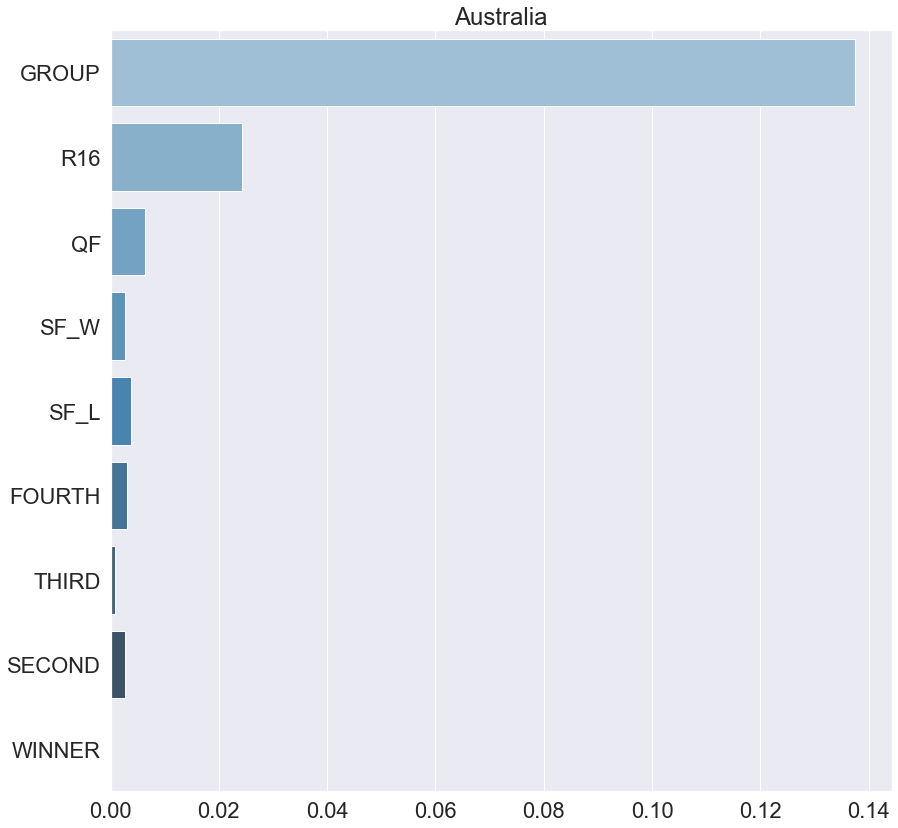

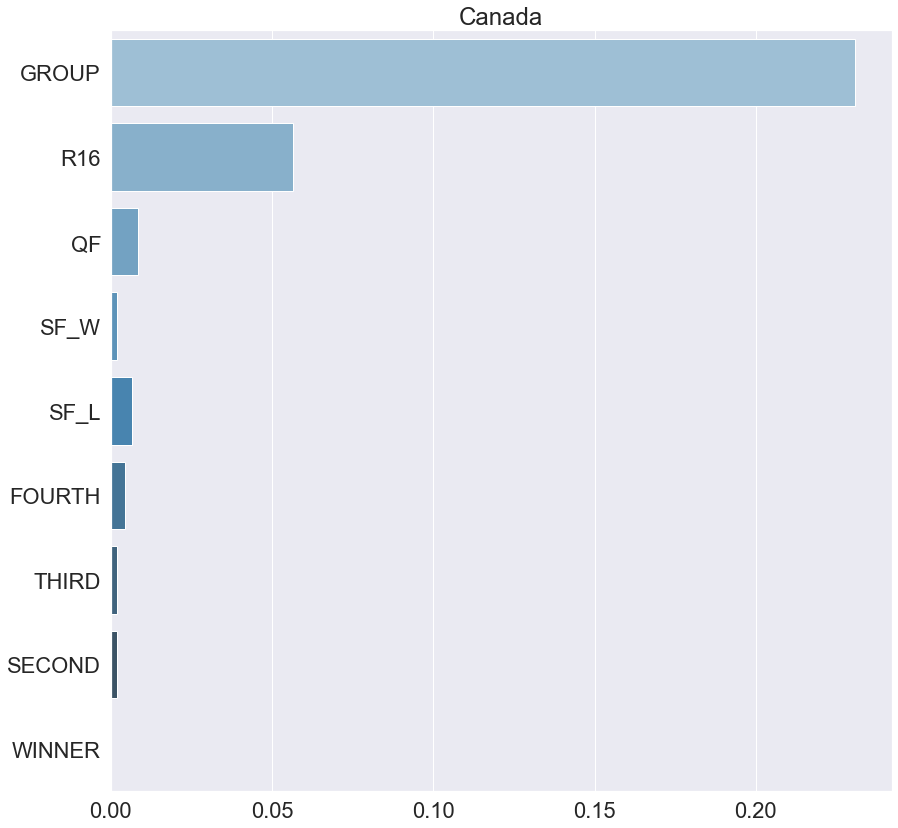

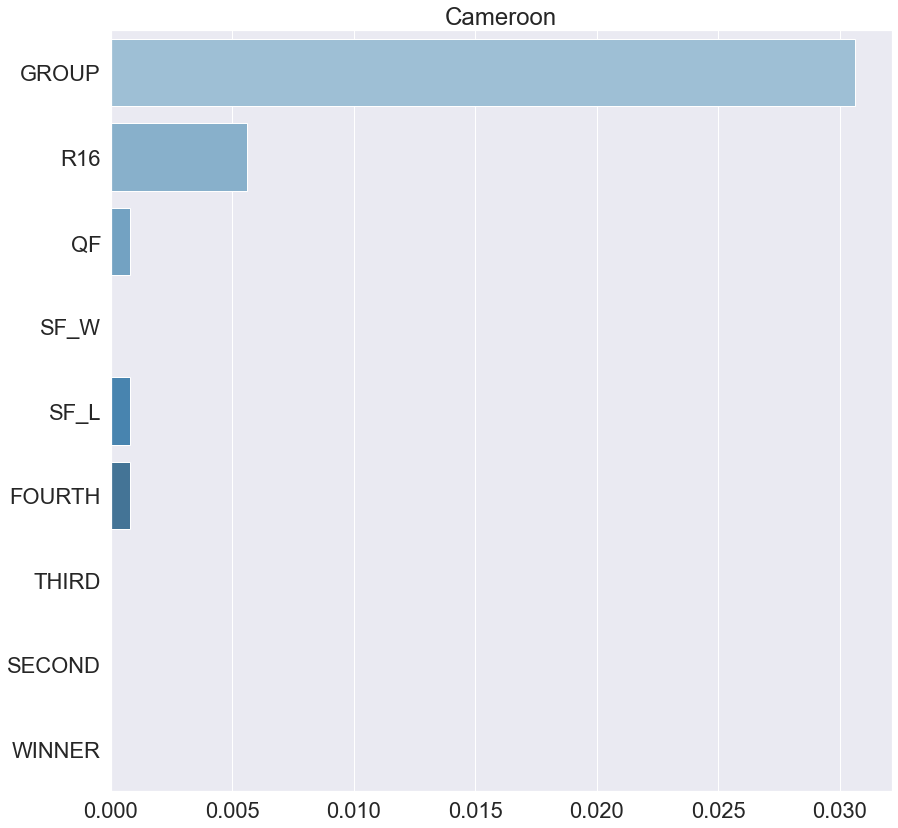

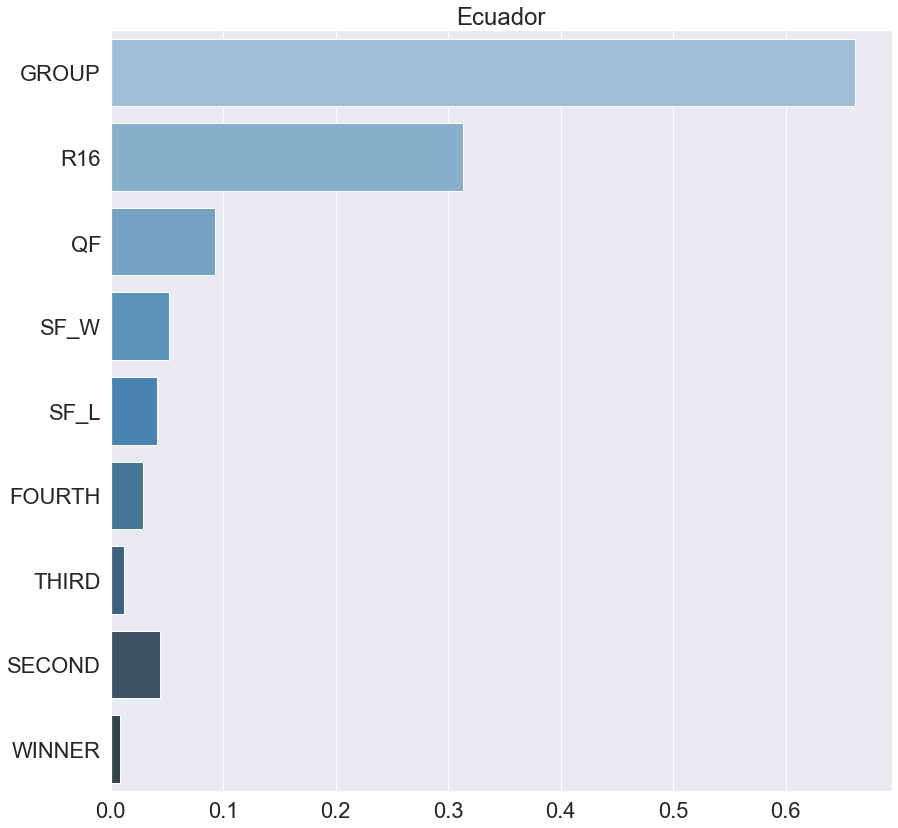

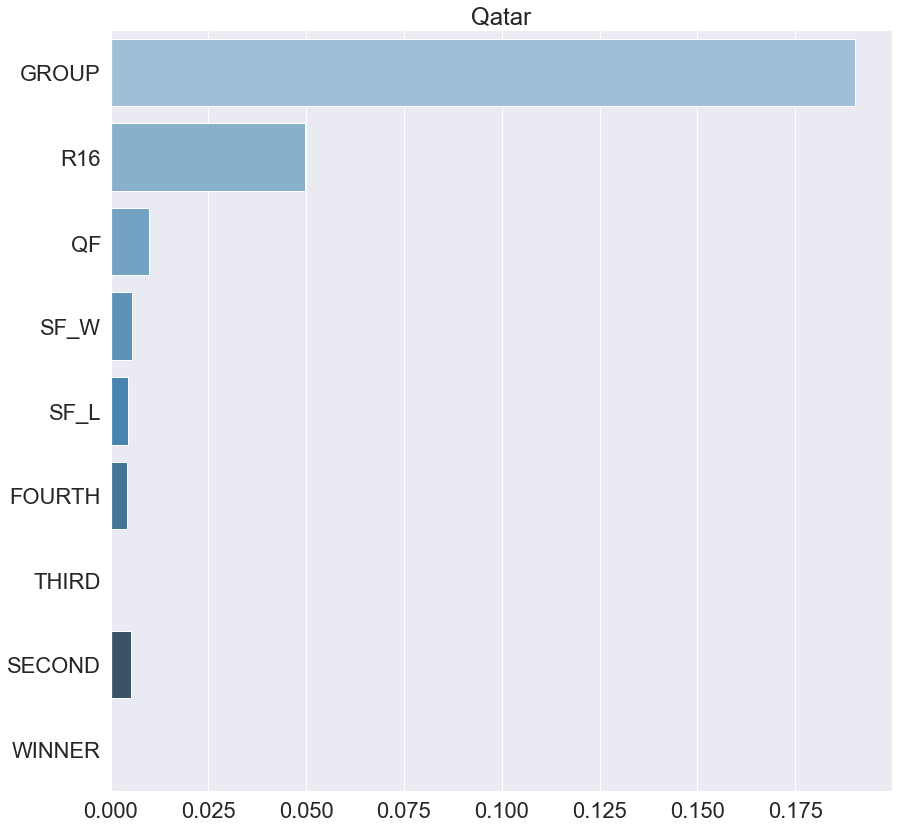

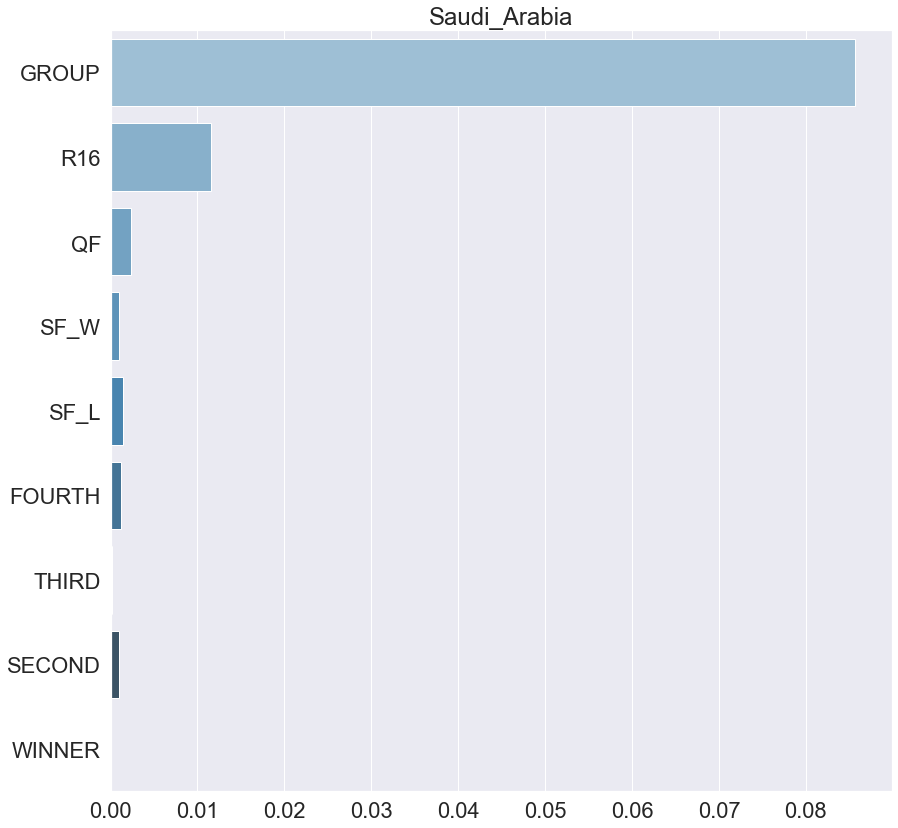

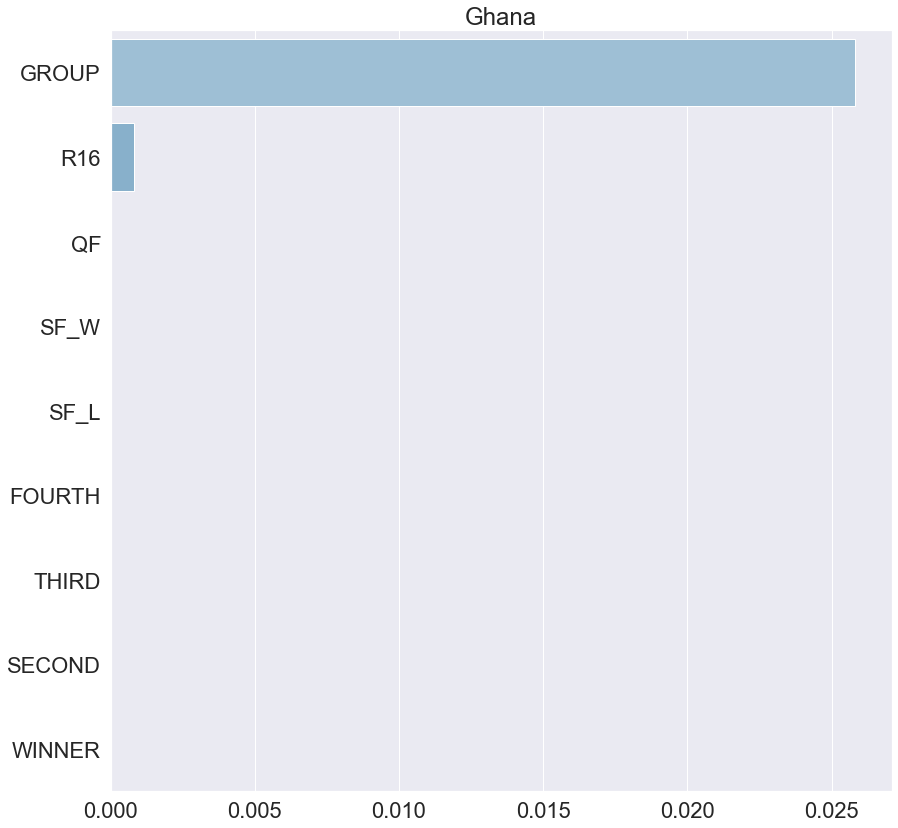

In [514]:
tier_name_list = ['GROUP','R16','QF','SF_W','SF_L','FOURTH','THIRD','SECOND','WINNER']

for country in countries:
    results = []
    for tier_name in tier_name_list:
        results.append((df_tier[(df_tier.country == country)&(df_tier.tier == tier_name)].sim_no.nunique())/(5000))

    sns.set(font_scale=2)
    # imp = df.groupby('country').median().sort_values(by='coins_won',ascending=False)
    plt.figure(figsize=(14,14))
    plt.title(country)
    ax = sns.barplot(y=tier_name_list, x=results, palette="Blues_d", orient='h')

In [427]:
df.groupby('country').median()

,coins_won,sim_no
country,,
Argentina,23.0,2499.5
Australia,64.0,2499.5
Belgium,6.0,2499.5
Brazil,23.0,2499.5
Cameroon,32.0,2499.5
Canada,64.0,2499.5
Costa_Rica,64.0,2499.5
Croatia,8.0,2499.5
Denmark,12.0,2499.5


In [428]:
df.groupby('country').mean()

,coins_won,sim_no
country,,
Argentina,115.6329,2499.5
Australia,85.2416,2499.5
Belgium,45.2029,2499.5
Brazil,125.6321,2499.5
Cameroon,27.3280,2499.5
Canada,129.6896,2499.5
Costa_Rica,86.0096,2499.5
Croatia,58.5876,2499.5
Denmark,140.7068,2499.5


In [429]:
df.groupby('country').max()

,coins_won,sim_no
country,,
Argentina,436.0,4999
Australia,9664.0,4999
Belgium,367.5,4999
Brazil,352.0,4999
Cameroon,1408.0,4999
Canada,10624.0,4999
Costa_Rica,10560.0,4999
Croatia,1470.0,4999
Denmark,1470.0,4999


In [545]:
a = 32
a+a+a+(4*a)+(16*a)#+(64*a)+(256*a)

736

In [431]:
# plt.figure(figsize = (10,7))
# sns.kdeplot(df[(df.country == countries[0])].coins_won, bw=0.05)
# sns.kdeplot(df[(df.country == countries[1])].coins_won, bw=0.05)
# sns.kdeplot(df[(df.country == countries[2])].coins_won, bw=0.05)
# sns.kdeplot(df[(df.country == countries[3])].coins_won, bw=0.05)

# plt.legend([countries[0], countries[1], countries[2], countries[3]], fontsize = 20)

# plt.xticks(fontsize=20)

# plt.xlabel('Coins_Won',fontsize=20)
# plt.ylabel('',fontsize=20)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

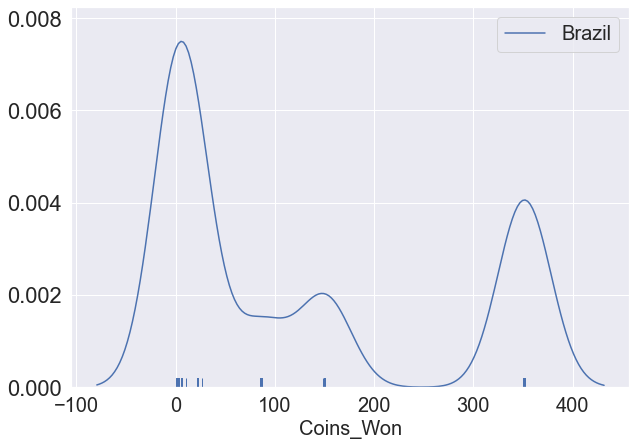

In [432]:
plt.figure(figsize = (10,7))
sns.distplot(df[(df.country == countries[0])].coins_won, hist=False, rug=True)

plt.legend([countries[0]], fontsize = 20)
plt.xticks(fontsize=20)
plt.xlabel('Coins_Won',fontsize=20)
plt.ylabel('',fontsize=20)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

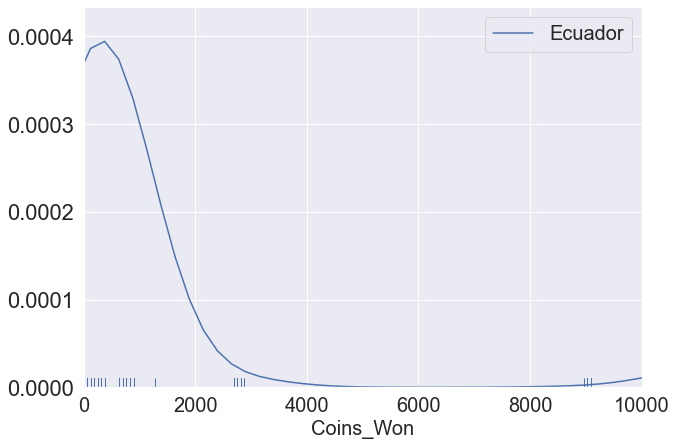

In [433]:
plt.figure(figsize = (10,7))
sns.distplot(df[(df.country == countries[28])].coins_won, hist=False, rug=True)

plt.legend([countries[28]], fontsize = 20)
plt.xticks(fontsize=20)
plt.xlim(0,10000)
plt.xlabel('Coins_Won',fontsize=20)
plt.ylabel('',fontsize=20)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg,

Text(0, 0.5, '')

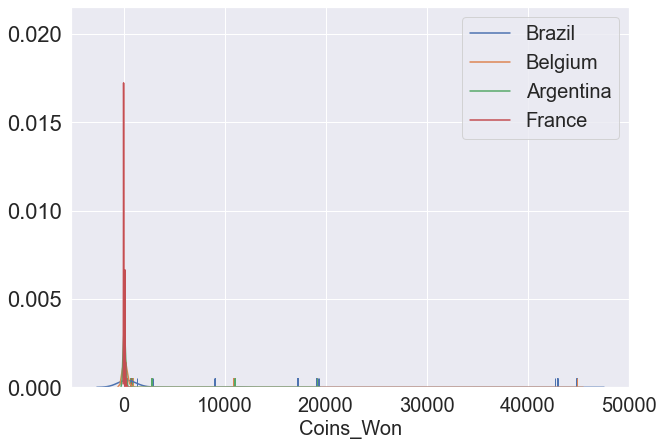

In [436]:
plt.figure(figsize = (10,7))
sns.distplot(df[(df.country == countries[28])].coins_won, hist=False, rug=True)
sns.distplot(df[(df.country == countries[29])].coins_won, hist=False, rug=True)
sns.distplot(df[(df.country == countries[30])].coins_won, hist=False, rug=True)
sns.distplot(df[(df.country == countries[31])].coins_won, hist=False, rug=True)

plt.legend([countries[0], countries[1], countries[2], countries[3]], fontsize = 20)

plt.xticks(fontsize=20)

plt.xlabel('Coins_Won',fontsize=20)
plt.ylabel('',fontsize=20)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packag

Text(0, 0.5, '')

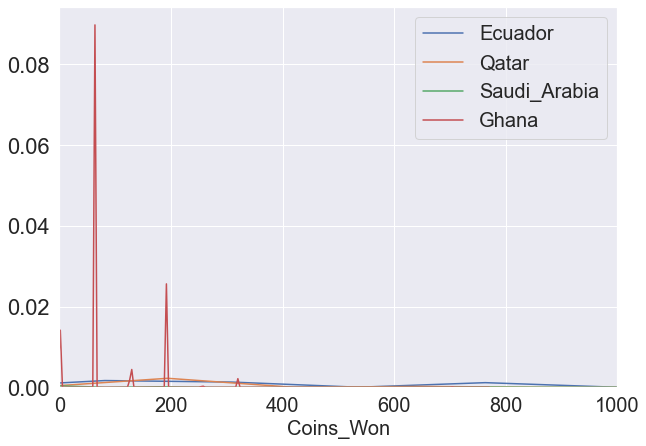

In [437]:
plt.figure(figsize = (10,7))
sns.kdeplot(df[(df.country == countries[28])].coins_won, bw=0.01)
sns.kdeplot(df[(df.country == countries[29])].coins_won, bw=0.01)
sns.kdeplot(df[(df.country == countries[30])].coins_won, bw=0.01)
sns.kdeplot(df[(df.country == countries[31])].coins_won, bw=0.01)

plt.legend([countries[28], countries[29], countries[30], countries[31]], fontsize = 20)

plt.xticks(fontsize=20)
plt.xlim(0,1000)

plt.xlabel('Coins_Won',fontsize=20)
plt.ylabel('',fontsize=20)

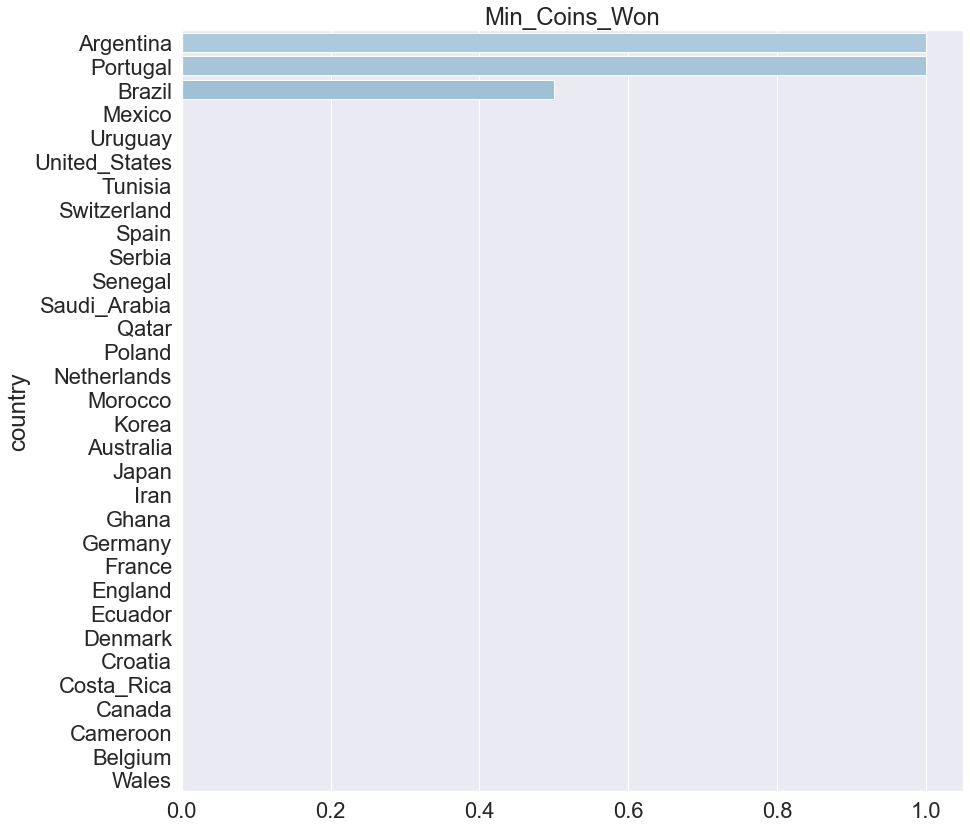

In [438]:
sns.set(font_scale=2)
imp = df.groupby('country').min().sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("Min_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

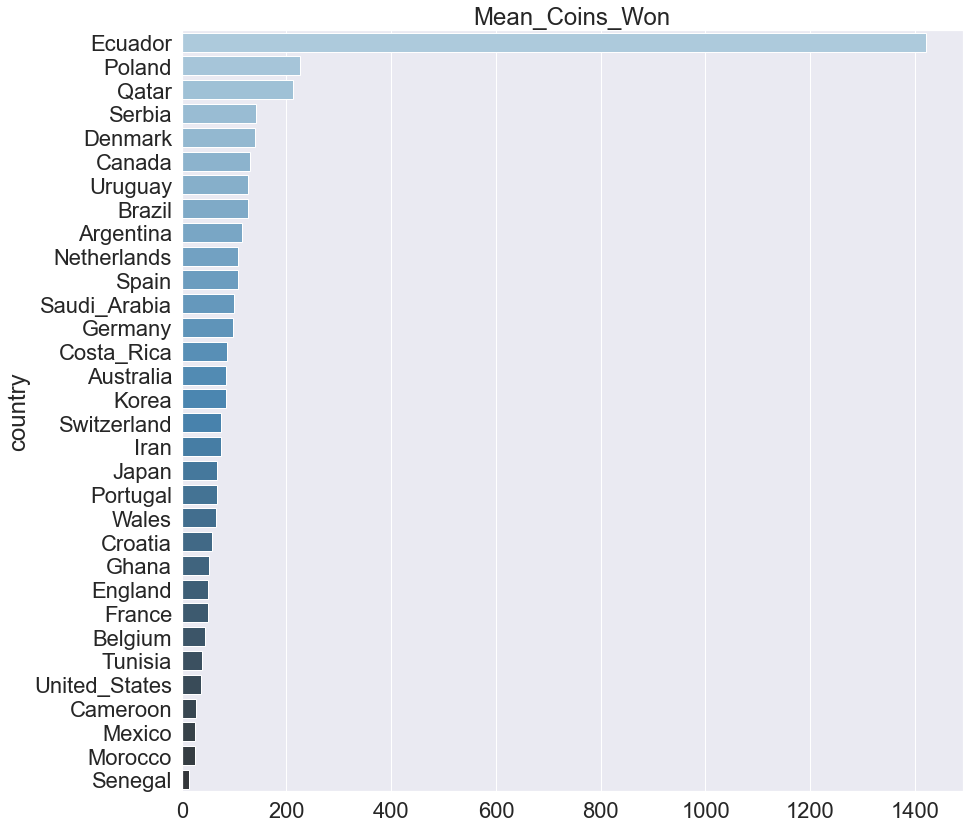

In [439]:
sns.set(font_scale=2)
imp = df.groupby('country').mean().sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("Mean_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

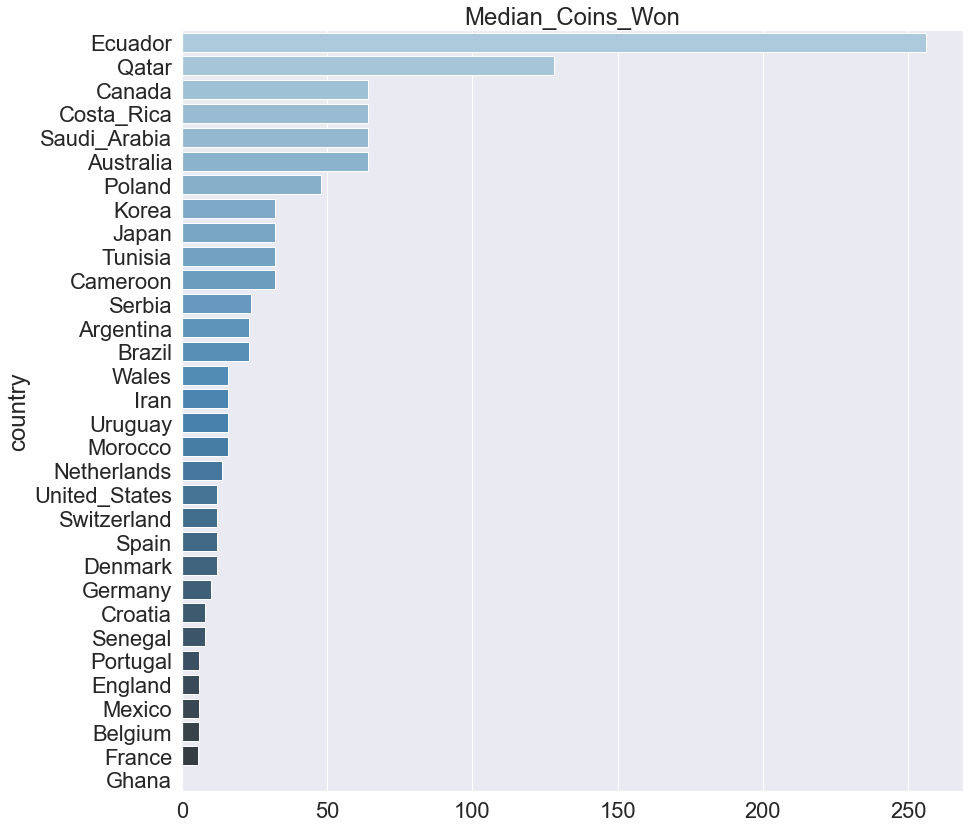

In [468]:
sns.set(font_scale=2)
imp = df.groupby('country').median().sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("Median_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

In [469]:
imp

,coins_won,sim_no
country,,
Ecuador,256.0,2499.5
Qatar,128.0,2499.5
Canada,64.0,2499.5
Costa_Rica,64.0,2499.5
Saudi_Arabia,64.0,2499.5
Australia,64.0,2499.5
Poland,48.0,2499.5
Korea,32.0,2499.5
Japan,32.0,2499.5


In [447]:
dic_elos

{'Brazil': 2169,
 'Belgium': 2025,
 'Argentina': 2143,
 'France': 2005,
 'England': 1920,
 'Spain': 2045,
 'Netherlands': 2040,
 'Portugal': 2004,
 'Denmark': 1971,
 'Germany': 1963,
 'Croatia': 1927,
 'Mexico': 1809,
 'Uruguay': 1936,
 'Switzerland': 1902,
 'United_States': 1798,
 'Senegal': 1687,
 'Wales': 1790,
 'Iran': 1797,
 'Serbia': 1892,
 'Morocco': 1753,
 'Japan': 1787,
 'Poland': 1814,
 'Korea': 1786,
 'Tunisia': 1707,
 'Costa_Rica': 1743,
 'Australia': 1719,
 'Canada': 1776,
 'Cameroon': 1609,
 'Ecuador': 1833,
 'Qatar': 1680,
 'Saudi_Arabia': 1635,
 'Ghana': 1567}

In [448]:
groups = [
['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
['England', 'Iran', 'United_States', 'Wales'],
['Argentina', 'Saudi_Arabia', 'Mexico', 'Poland'],
['France', 'Australia', 'Denmark', 'Tunisia'],
['Spain', 'Costa_Rica', 'Germany', 'Japan'],
['Belgium', 'Canada', 'Morocco', 'Croatia'],
['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
['Portugal', 'Ghana', 'Uruguay', 'Korea']]

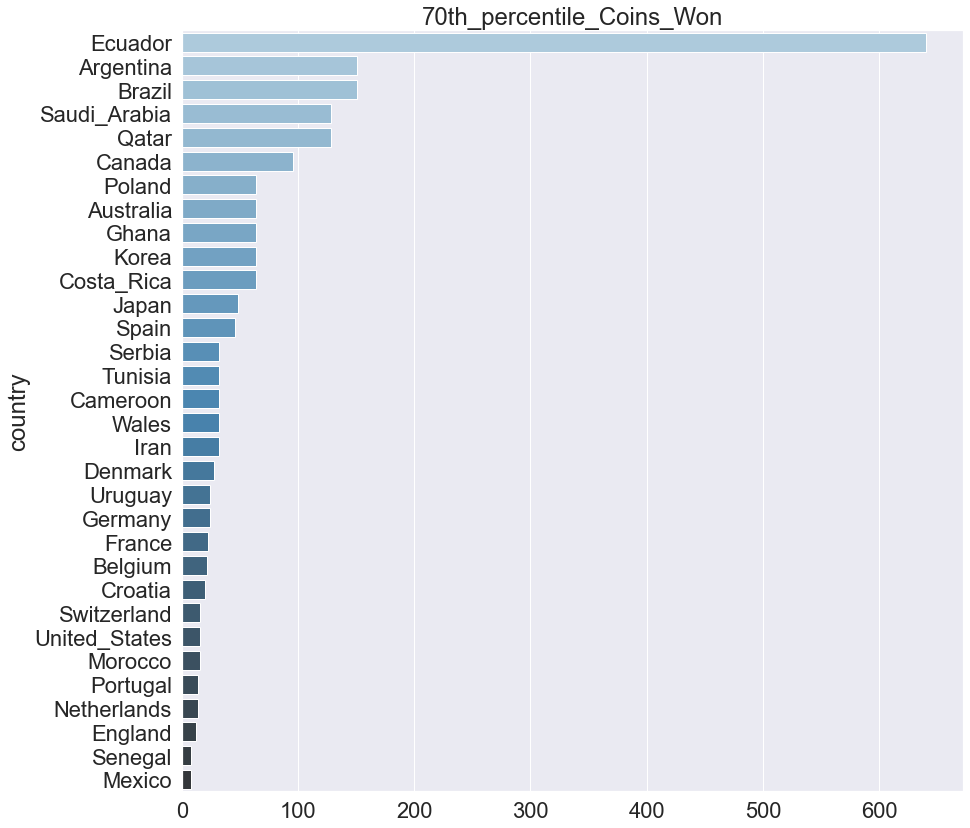

In [464]:
sns.set(font_scale=2)
imp = df.groupby('country').quantile(0.7).sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("70th_percentile_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

In [486]:
a = 2
a+a+a+(4*a)#+(16*a)+(64*a)#+(256*a)

14

In [482]:
imp

,coins_won,sim_no
country,,
Ecuador,768.0,3999.2
Brazil,351.5,3999.2
Argentina,351.0,3999.2
Qatar,192.0,3999.2
Spain,173.0,3999.2
Netherlands,172.0,3999.2
Canada,128.0,3999.2
Ghana,128.0,3999.2
Saudi_Arabia,128.0,3999.2


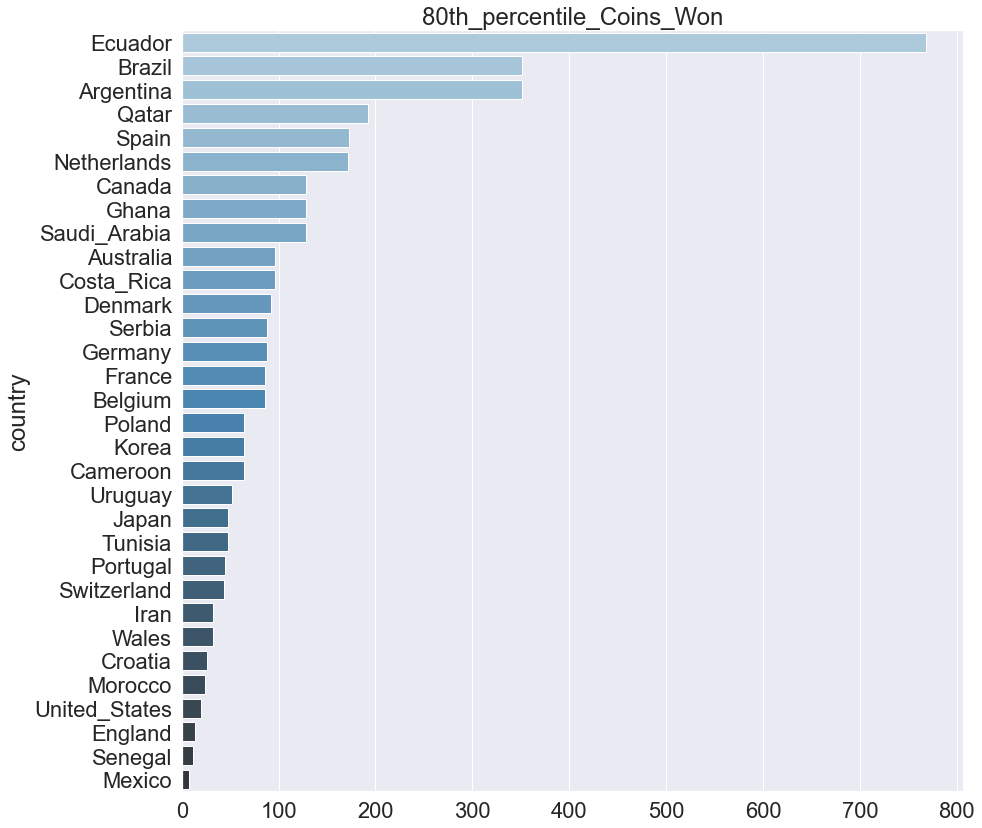

In [481]:
sns.set(font_scale=2)
imp = df.groupby('country').quantile(0.8).sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("80th_percentile_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

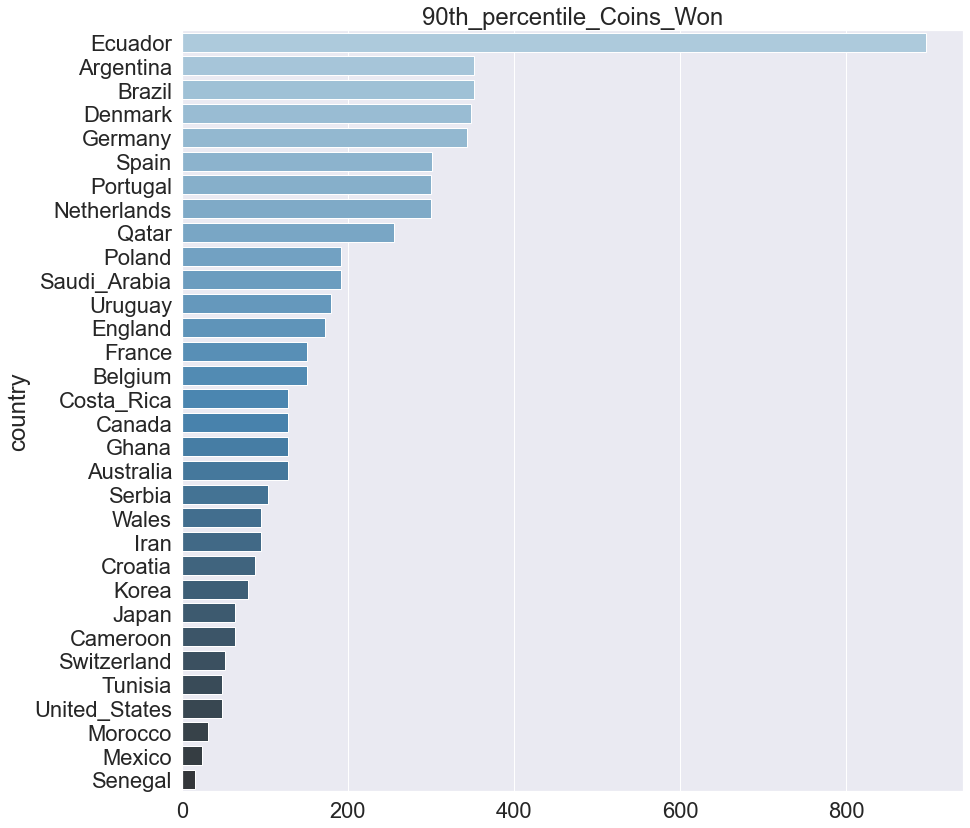

In [459]:
sns.set(font_scale=2)
imp = df.groupby('country').quantile(0.9).sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("90th_percentile_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

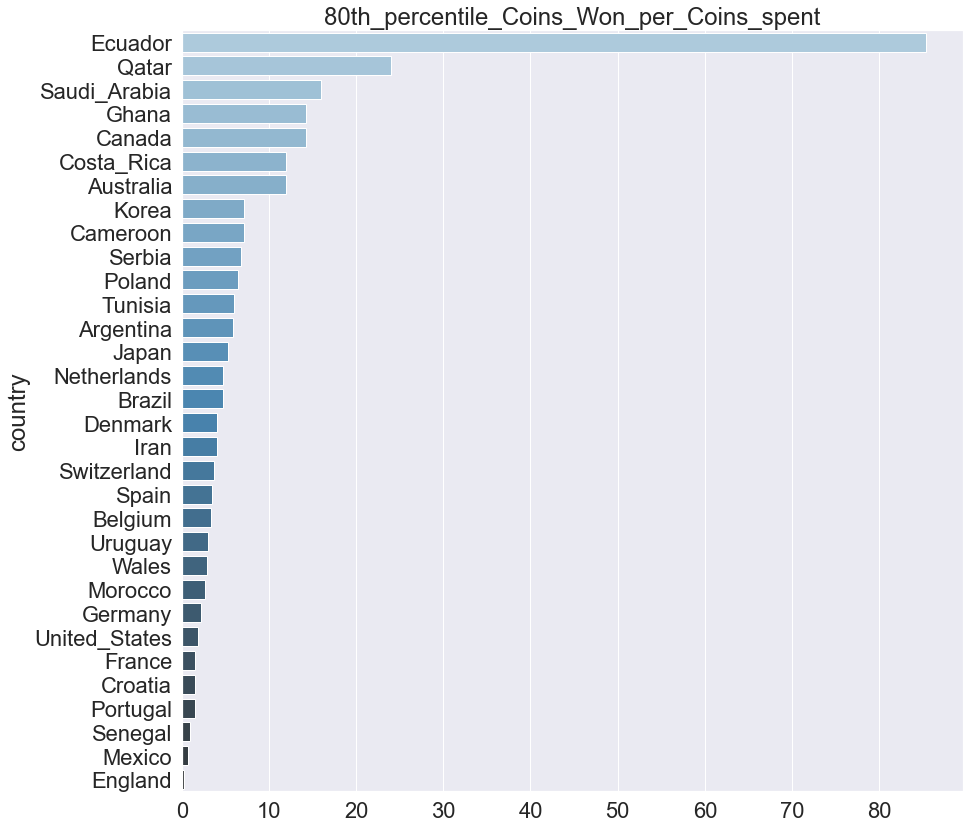

In [531]:
sns.set(font_scale=2)
T1 = pd.merge(df.groupby('country').quantile(0.8), pd.DataFrame.from_dict(dic_price, orient ='index'), left_index=True, right_index=True, how='left')
T1['coins_won_80'] = T1['coins_won']/T1[0]
imp = T1.sort_values(by='coins_won_80',ascending=False)
plt.figure(figsize=(14,14))
plt.title("80th_percentile_Coins_Won_per_Coins_spent")
ax = sns.barplot(y=imp.index, x=imp.coins_won_80.values, palette="Blues_d", orient='h')

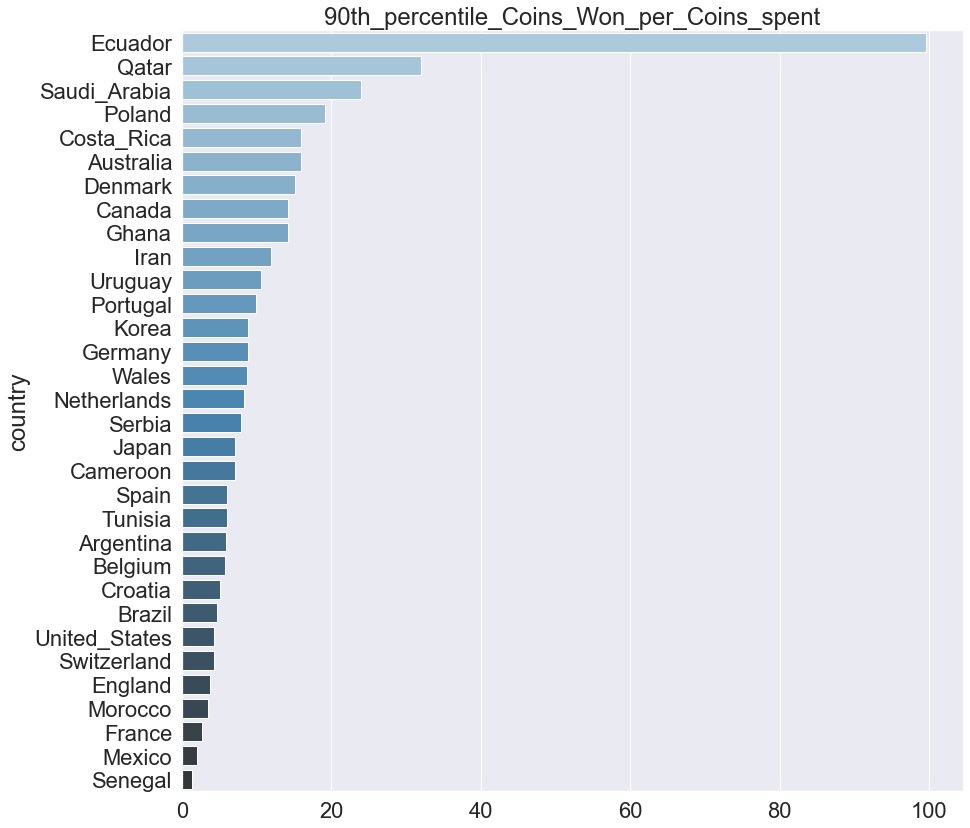

In [532]:
sns.set(font_scale=2)
T1 = pd.merge(df.groupby('country').quantile(0.9), pd.DataFrame.from_dict(dic_price, orient ='index'), left_index=True, right_index=True, how='left')
T1['coins_won_90'] = T1['coins_won']/T1[0]
imp = T1.sort_values(by='coins_won_90',ascending=False)
plt.figure(figsize=(14,14))
plt.title("90th_percentile_Coins_Won_per_Coins_spent")
ax = sns.barplot(y=imp.index, x=imp.coins_won_90.values, palette="Blues_d", orient='h')

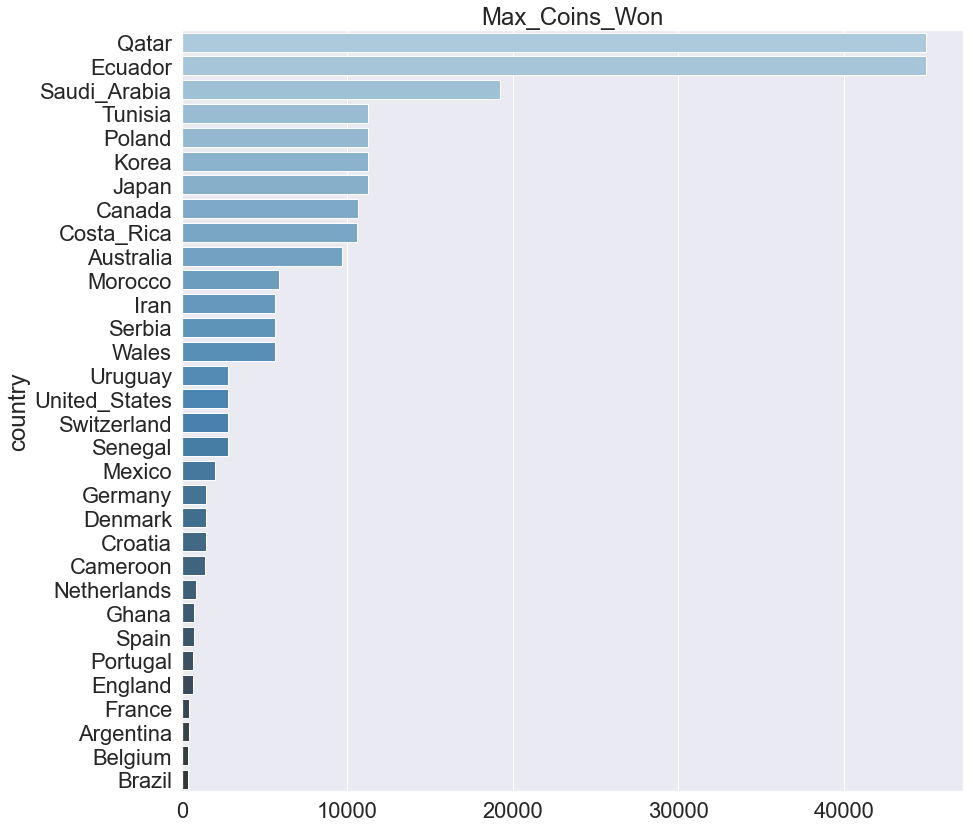

In [462]:
sns.set(font_scale=2)
imp = df.groupby('country').max().sort_values(by='coins_won',ascending=False)
plt.figure(figsize=(14,14))
plt.title("Max_Coins_Won")
ax = sns.barplot(y=imp.index, x=imp.values[:,0], palette="Blues_d", orient='h')

## Rought work

In [5]:
group_A = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_B = ['England', 'Iran', 'United_States', 'Wales']
group_C = ['Argentina', 'Saudi_Arabia', 'Mexico', 'Poland']
group_D = ['France', 'Australia', 'Denmark', 'Tunisia']
group_E = ['Spain', 'Costa_Rica', 'Germany', 'Japan']
group_F = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_G = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_H = ['Portugal', 'Ghana', 'Uruguay', 'Korea']

In [658]:
# Groups, 16 winners from the groups
print(A1)
print(A2)
print(B1)
print(B2)
print(C1)
print(C2)
print(D1)
print(D2)
print(E1)
print(E2)
print(F1)
print(F2)
print(G1)
print(G2)
print(H1)
print(H2)

# R16, 8 winners from the round of 16
print(R16_A)
print(R16_B)
print(R16_C)
print(R16_D)
print(R16_E)
print(R16_F)
print(R16_G)
print(R16_H)

#QF, 4 winners from the QFs
print(QF1)
print(QF2)
print(QF3)
print(QF4)

#Last Four, and the final four have two more matches to get the final order
print(third)
print(fourth)
print(winner)
print(second)

Netherlands
Ecuador
Iran
Wales
Poland
Argentina
France
Australia
Spain
Costa_Rica
Croatia
Belgium
Switzerland
Brazil
Uruguay
Ghana
Netherlands
Australia
Argentina
Iran
Spain
Switzerland
Costa_Rica
Brazil
Spain
Netherlands
Brazil
Iran
Spain
Iran
Brazil
Netherlands


In [16]:
# Function to calculate Elo rating
# K is a constant.
# d determines whether
# Player A wins or Player B.
def EloRating(Ra, Rb, K, d):
  
 
    # To calculate the Winning
    # Probability of Player B
    Pb = Probability(Ra, Rb)
 
    # To calculate the Winning
    # Probability of Player A
    Pa = Probability(Rb, Ra)
 
    # Case -1 When Player A wins
    # Updating the Elo Ratings
    if (d == 1) :
        Ra = Ra + K * (1 - Pa)
        Rb = Rb + K * (0 - Pb)
     
 
    # Case -2 When Player B wins
    # Updating the Elo Ratings
    else :
        Ra = Ra + K * (0 - Pa)
        Rb = Rb + K * (1 - Pb)
     
 
    print("Updated Ratings:-")
    print("Ra =", round(Ra, 6)," Rb =", round(Rb, 6))

In [17]:
# # Ra and Rb are current ELO ratings
# Ra = 1200
# Rb = 1000
# K = 30
# d = 1
# #EloRating(Ra, Rb, K, d)

In [657]:
# A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A #

# count up wins. this now counts points instead of wins
count_wins_A = [0,0,0,0]

#using the Elo diff to decide on ties between 2&3rd spots
#each element corresponds to a match. For ease I've kept the possibility of QatarvQatar match etc
# we add the elo_diff to the corresponding element if a teams wins a match
elo_diff_match_A = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_A)-1):
    for j in range(i+1,len(group_A)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_A[i]], dic_elos[group_A[j]])):
            # say if Senegal beats Netherlands, their eol_diff gets added at [2][3]
            # I'm sure this is biased towards teams either with higher or lower Elo but I don't care to think about it
            count_wins_A[i] += 3
            elo_diff_match_A[i][j] += (Probability(dic_elos[group_A[i]], dic_elos[group_A[j]]) - prob_i_wins)
            dic_coin_ret[group_A[i]]+=dic_coin_win[group_A[i]]
            
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_A[i]], dic_elos[group_A[j]])):
            # if Netherlands beats Senegal, their eol_diff gets added at [3][2]
            count_wins_A[j] += 3
            elo_diff_match_A[j][i] += (prob_i_wins - Probability(dic_elos[group_A[i]], dic_elos[group_A[j]]))
            dic_coin_ret[group_A[j]]+=dic_coin_win[group_A[j]]
            
        else:
            count_wins_A[i] += 1
            count_wins_A[j] += 1
            
            dic_coin_ret[group_A[i]]+=(dic_coin_win[group_A[i]])*0.5
            dic_coin_ret[group_A[j]]+=(dic_coin_win[group_A[j]])*0.5

elo_diff_A = []
for i in range(np.shape(elo_diff_match_A)[0]):
    # print (np.sum(elo_diff_match_A[i]))
    elo_diff_A.append(np.sum(elo_diff_match_A[i]))

# Dealing with all the ways teams can be ranked on pts and then finding the best by Elo difference

try:
    A1 = group_A[ss.rankdata(count_wins_A).tolist().index(4)]
    A2 = group_A[ss.rankdata(count_wins_A).tolist().index(3)]
    
except:


    if ((ss.rankdata(count_wins_A) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_A) == 3.0).astype(int).sum() == 3):

        A1 = group_A[ss.rankdata(elo_diff_A).tolist().index(4)]
        A2 = group_A[ss.rankdata(elo_diff_A).tolist().index(3)]

    elif ((ss.rankdata(count_wins_A) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_A).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_A[indices[0]] > elo_diff_A[indices[1]]:
            A1 = group_A[indices[0]]
            A2 = group_A[indices[1]]

        else:
            A1 = group_A[indices[1]]
            A2 = group_A[indices[0]]


    elif ((ss.rankdata(count_wins_A) == 2.5).astype(int).sum() == 2):

        A1 = group_A[ss.rankdata(count_wins_A).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_A).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_A[indices[0]] > elo_diff_A[indices[1]]:
            A2 = group_A[indices[0]]

        else:
            A2 = group_A[indices[1]]
    
# B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B #

count_wins_B = [0,0,0,0]
elo_diff_match_B = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_B)-1):
    for j in range(i+1,len(group_B)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_B[i]], dic_elos[group_B[j]])):
            count_wins_B[i] += 3
            elo_diff_match_B[i][j] += (Probability(dic_elos[group_B[i]], dic_elos[group_B[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_B[i]], dic_elos[group_B[j]])):
            count_wins_B[j] += 3
            elo_diff_match_B[j][i] += (prob_i_wins - Probability(dic_elos[group_B[i]], dic_elos[group_B[j]]))
            
        else:
            count_wins_B[i] += 1
            count_wins_B[j] += 1
                

elo_diff_B = []
for i in range(np.shape(elo_diff_match_B)[0]):
    elo_diff_B.append(np.sum(elo_diff_match_B[i]))

    
try:
    B1 = group_B[ss.rankdata(count_wins_B).tolist().index(4)]
    B2 = group_B[ss.rankdata(count_wins_B).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_B) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_B) == 3.0).astype(int).sum() == 3):

        B1 = group_B[ss.rankdata(elo_diff_B).tolist().index(4)]
        B2 = group_B[ss.rankdata(elo_diff_B).tolist().index(3)]

    elif ((ss.rankdata(count_wins_B) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_B).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_B[indices[0]] > elo_diff_B[indices[1]]:
            B1 = group_B[indices[0]]
            B2 = group_B[indices[1]]

        else:
            B1 = group_B[indices[1]]
            B2 = group_B[indices[0]]


    elif ((ss.rankdata(count_wins_B) == 2.5).astype(int).sum() == 2):

        B1 = group_B[ss.rankdata(count_wins_B).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_B).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_B[indices[0]] > elo_diff_B[indices[1]]:
            B2 = group_B[indices[0]]

        else:
            B2 = group_B[indices[1]]

# C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C #

count_wins_C = [0,0,0,0]
elo_diff_match_C = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_C)-1):
    for j in range(i+1,len(group_C)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_C[i]], dic_elos[group_C[j]])):
            count_wins_C[i] += 3
            elo_diff_match_C[i][j] += (Probability(dic_elos[group_C[i]], dic_elos[group_C[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_C[i]], dic_elos[group_C[j]])):
            count_wins_C[j] += 3
            elo_diff_match_C[j][i] += (prob_i_wins - Probability(dic_elos[group_C[i]], dic_elos[group_C[j]]))
            
        else:
            count_wins_C[i] += 1
            count_wins_C[j] += 1
                

elo_diff_C = []
for i in range(np.shape(elo_diff_match_C)[0]):
    elo_diff_C.append(np.sum(elo_diff_match_C[i]))
    
try:
    C1 = group_C[ss.rankdata(count_wins_C).tolist().index(4)]
    C2 = group_C[ss.rankdata(count_wins_C).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_C) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_C) == 3.0).astype(int).sum() == 3):

        C1 = group_C[ss.rankdata(elo_diff_C).tolist().index(4)]
        C2 = group_C[ss.rankdata(elo_diff_C).tolist().index(3)]

    elif ((ss.rankdata(count_wins_C) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_C).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_C[indices[0]] > elo_diff_C[indices[1]]:
            C1 = group_C[indices[0]]
            C2 = group_C[indices[1]]

        else:
            C1 = group_C[indices[1]]
            C2 = group_C[indices[0]]


    elif ((ss.rankdata(count_wins_C) == 2.5).astype(int).sum() == 2):

        C1 = group_C[ss.rankdata(count_wins_C).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_C).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_C[indices[0]] > elo_diff_C[indices[1]]:
            C2 = group_C[indices[0]]

        else:
            C2 = group_C[indices[1]]

# D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D #

count_wins_D = [0,0,0,0]
elo_diff_match_D = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_D)-1):
    for j in range(i+1,len(group_D)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_D[i]], dic_elos[group_D[j]])):
            count_wins_D[i] += 3
            elo_diff_match_D[i][j] += (Probability(dic_elos[group_D[i]], dic_elos[group_D[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_D[i]], dic_elos[group_D[j]])):
            count_wins_D[j] += 3
            elo_diff_match_D[j][i] += (prob_i_wins - Probability(dic_elos[group_D[i]], dic_elos[group_D[j]]))
            
        else:
            count_wins_D[i] += 1
            count_wins_D[j] += 1
                

elo_diff_D = []
for i in range(np.shape(elo_diff_match_D)[0]):
    elo_diff_D.append(np.sum(elo_diff_match_D[i]))
    
try:
    D1 = group_D[ss.rankdata(count_wins_D).tolist().index(4)]
    D2 = group_D[ss.rankdata(count_wins_D).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_D) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_D) == 3.0).astype(int).sum() == 3):

        D1 = group_D[ss.rankdata(elo_diff_D).tolist().index(4)]
        D2 = group_D[ss.rankdata(elo_diff_D).tolist().index(3)]

    elif ((ss.rankdata(count_wins_D) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_D).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_D[indices[0]] > elo_diff_D[indices[1]]:
            D1 = group_D[indices[0]]
            D2 = group_D[indices[1]]

        else:
            D1 = group_D[indices[1]]
            D2 = group_D[indices[0]]


    elif ((ss.rankdata(count_wins_D) == 2.5).astype(int).sum() == 2):

        D1 = group_D[ss.rankdata(count_wins_D).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_D).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_D[indices[0]] > elo_diff_D[indices[1]]:
            D2 = group_D[indices[0]]

        else:
            D2 = group_D[indices[1]]

# E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E #

count_wins_E = [0,0,0,0]
elo_diff_match_E = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_E)-1):
    for j in range(i+1,len(group_E)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_E[i]], dic_elos[group_E[j]])):
            count_wins_E[i] += 3
            elo_diff_match_E[i][j] += (Probability(dic_elos[group_E[i]], dic_elos[group_E[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_E[i]], dic_elos[group_E[j]])):
            count_wins_E[j] += 3
            elo_diff_match_E[j][i] += (prob_i_wins - Probability(dic_elos[group_E[i]], dic_elos[group_E[j]]))
            
        else:
            count_wins_E[i] += 1
            count_wins_E[j] += 1
                

elo_diff_E = []
for i in range(np.shape(elo_diff_match_E)[0]):
    elo_diff_E.append(np.sum(elo_diff_match_E[i]))
    
try:
    E1 = group_E[ss.rankdata(count_wins_E).tolist().index(4)]
    E2 = group_E[ss.rankdata(count_wins_E).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_E) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_E) == 3.0).astype(int).sum() == 3):

        E1 = group_E[ss.rankdata(elo_diff_E).tolist().index(4)]
        E2 = group_E[ss.rankdata(elo_diff_E).tolist().index(3)]

    elif ((ss.rankdata(count_wins_E) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_E).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_E[indices[0]] > elo_diff_E[indices[1]]:
            E1 = group_E[indices[0]]
            E2 = group_E[indices[1]]

        else:
            E1 = group_E[indices[1]]
            E2 = group_E[indices[0]]


    elif ((ss.rankdata(count_wins_E) == 2.5).astype(int).sum() == 2):

        E1 = group_E[ss.rankdata(count_wins_E).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_E).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_E[indices[0]] > elo_diff_E[indices[1]]:
            E2 = group_E[indices[0]]

        else:
            E2 = group_E[indices[1]]

# F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F #

count_wins_F = [0,0,0,0]
elo_diff_match_F = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_F)-1):
    for j in range(i+1,len(group_F)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_F[i]], dic_elos[group_F[j]])):
            count_wins_F[i] += 3
            elo_diff_match_F[i][j] += (Probability(dic_elos[group_F[i]], dic_elos[group_F[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_F[i]], dic_elos[group_F[j]])):
            count_wins_F[j] += 3
            elo_diff_match_F[j][i] += (prob_i_wins - Probability(dic_elos[group_F[i]], dic_elos[group_F[j]]))
            
        else:
            count_wins_F[i] += 1
            count_wins_F[j] += 1
                

elo_diff_F = []
for i in range(np.shape(elo_diff_match_F)[0]):
    elo_diff_F.append(np.sum(elo_diff_match_F[i]))
    
try:
    F1 = group_F[ss.rankdata(count_wins_F).tolist().index(4)]
    F2 = group_F[ss.rankdata(count_wins_F).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_F) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_F) == 3.0).astype(int).sum() == 3):

        F1 = group_F[ss.rankdata(elo_diff_F).tolist().index(4)]
        F2 = group_F[ss.rankdata(elo_diff_F).tolist().index(3)]

    elif ((ss.rankdata(count_wins_F) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_F).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_F[indices[0]] > elo_diff_F[indices[1]]:
            F1 = group_F[indices[0]]
            F2 = group_F[indices[1]]

        else:
            F1 = group_F[indices[1]]
            F2 = group_F[indices[0]]


    elif ((ss.rankdata(count_wins_F) == 2.5).astype(int).sum() == 2):

        F1 = group_F[ss.rankdata(count_wins_F).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_F).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_F[indices[0]] > elo_diff_F[indices[1]]:
            F2 = group_F[indices[0]]

        else:
            F2 = group_F[indices[1]]

# G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G #

count_wins_G = [0,0,0,0]
elo_diff_match_G = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_G)-1):
    for j in range(i+1,len(group_G)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_G[i]], dic_elos[group_G[j]])):
            count_wins_G[i] += 3
            elo_diff_match_G[i][j] += (Probability(dic_elos[group_G[i]], dic_elos[group_G[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_G[i]], dic_elos[group_G[j]])):
            count_wins_G[j] += 3
            elo_diff_match_G[j][i] += (prob_i_wins - Probability(dic_elos[group_G[i]], dic_elos[group_G[j]]))
            
        else:
            count_wins_G[i] += 1
            count_wins_G[j] += 1
                

elo_diff_G = []
for i in range(np.shape(elo_diff_match_G)[0]):
    elo_diff_G.append(np.sum(elo_diff_match_G[i]))
    
try:
    G1 = group_G[ss.rankdata(count_wins_G).tolist().index(4)]
    G2 = group_G[ss.rankdata(count_wins_G).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_G) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_G) == 3.0).astype(int).sum() == 3):

        G1 = group_G[ss.rankdata(elo_diff_G).tolist().index(4)]
        G2 = group_G[ss.rankdata(elo_diff_G).tolist().index(3)]

    elif ((ss.rankdata(count_wins_G) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_G).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_G[indices[0]] > elo_diff_G[indices[1]]:
            G1 = group_G[indices[0]]
            G2 = group_G[indices[1]]

        else:
            G1 = group_G[indices[1]]
            G2 = group_G[indices[0]]


    elif ((ss.rankdata(count_wins_G) == 2.5).astype(int).sum() == 2):

        G1 = group_G[ss.rankdata(count_wins_G).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_G).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_G[indices[0]] > elo_diff_G[indices[1]]:
            G2 = group_G[indices[0]]

        else:
            G2 = group_G[indices[1]]

# H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H #

count_wins_H = [0,0,0,0]
elo_diff_match_H = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_H)-1):
    for j in range(i+1,len(group_H)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_H[i]], dic_elos[group_H[j]])):
            count_wins_H[i] += 3
            elo_diff_match_H[i][j] += (Probability(dic_elos[group_H[i]], dic_elos[group_H[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_H[i]], dic_elos[group_H[j]])):
            count_wins_H[j] += 3
            elo_diff_match_H[j][i] += (prob_i_wins - Probability(dic_elos[group_H[i]], dic_elos[group_H[j]]))
            
        else:
            count_wins_H[i] += 1
            count_wins_H[j] += 1
                

elo_diff_H = []
for i in range(np.shape(elo_diff_match_H)[0]):
    elo_diff_H.append(np.sum(elo_diff_match_H[i]))
    
try:
    H1 = group_H[ss.rankdata(count_wins_H).tolist().index(4)]
    H2 = group_H[ss.rankdata(count_wins_H).tolist().index(3)]
    
except:
    if ((ss.rankdata(count_wins_H) == 2.0).astype(int).sum() == 3) |\
       ((ss.rankdata(count_wins_H) == 3.0).astype(int).sum() == 3):

        H1 = group_H[ss.rankdata(elo_diff_H).tolist().index(4)]
        H2 = group_H[ss.rankdata(elo_diff_H).tolist().index(3)]

    elif ((ss.rankdata(count_wins_H) == 1.5).astype(int).sum() == 2):

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_H).tolist()[i] == 3.5:
                indices.append(i)

        if elo_diff_H[indices[0]] > elo_diff_H[indices[1]]:
            H1 = group_H[indices[0]]
            H2 = group_H[indices[1]]

        else:
            H1 = group_H[indices[1]]
            H2 = group_H[indices[0]]


    elif ((ss.rankdata(count_wins_H) == 2.5).astype(int).sum() == 2):

        H1 = group_H[ss.rankdata(count_wins_H).tolist().index(4)]

        indices = []
        for i in range(4):
            if ss.rankdata(count_wins_H).tolist()[i] == 2.5:
                indices.append(i)

        if elo_diff_H[indices[0]] > elo_diff_H[indices[1]]:
            H2 = group_H[indices[0]]

        else:
            H2 = group_H[indices[1]]

In [ ]:
# A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A ## A #

count_wins_A = [0,0,0,0]

elo_diff_match_A = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]


for i in range(len(group_A)-1):
    for j in range(i+1,len(group_A)):

        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < 0.9*(Probability(dic_elos[group_A[i]], dic_elos[group_A[j]])):
            
            count_wins_A[i] += 3
            elo_diff_match_A[i][j] += (Probability(dic_elos[group_A[i]], dic_elos[group_A[j]]) - prob_i_wins)
            
        elif prob_i_wins > 1.1*(Probability(dic_elos[group_A[i]], dic_elos[group_A[j]])):
            
            count_wins_A[j] += 3
            elo_diff_match_A[j][i] += (prob_i_wins - Probability(dic_elos[group_A[i]], dic_elos[group_A[j]]))
            
            
        else:
            count_wins_A[i] += 1
            count_wins_A[j] += 1
            
print (count_wins_A)
print (ss.rankdata(count_wins_A))


elo_diff_A = []
for i in range(np.shape(elo_diff_match_A)[0]):
    elo_diff_A.append(np.sum(elo_diff_match_A[i]))

print (elo_diff_A)


if ((ss.rankdata(count_wins_A) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_A) == 3.0).astype(int).sum() == 3):
    
    A1 = group_A[ss.rankdata(elo_diff_A).tolist().index(4)]
    A2 = group_A[ss.rankdata(elo_diff_A).tolist().index(3)]
    
elif ((ss.rankdata(count_wins_A) == 1.5).astype(int).sum() == 2):
    
    indices = []
    for i in range(4):
        if ss.rankdata(count_wins_A).tolist()[i] == 3.5:
            indices.append(i)
    
    if elo_diff_A[indices[0]] > elo_diff_A[indices[1]]:
        A1 = group_A[indices[0]]
        A2 = group_A[indices[1]]

    else:
        A1 = group_A[indices[1]]
        A2 = group_A[indices[0]]
        
        
elif ((ss.rankdata(count_wins_A) == 2.5).astype(int).sum() == 2):
    
    A1 = group_A[ss.rankdata(count_wins_A).tolist().index(4)]
    
    indices = []
    for i in range(4):
        if ss.rankdata(count_wins_A).tolist()[i] == 2.5:
            indices.append(i)
    
    if elo_diff_A[indices[0]] > elo_diff_A[indices[1]]:
        A2 = group_A[indices[0]]
        
    else:
        A2 = group_A[indices[1]]
    
else:
    
    A1 = group_A[ss.rankdata(count_wins_A).tolist().index(4)]
    A2 = group_A[ss.rankdata(count_wins_A).tolist().index(3)]

print (A1)
print (A2)

In [457]:
# B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B ## B #

count_wins_B = [0,0,0,0]
elo_diff_match_B = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_B)-1):
    for j in range(i+1,len(group_B)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_B[i]], dic_elos[group_B[j]]):
            count_wins_B[i] +=1
            elo_diff_match_B[i][j] += (Probability(dic_elos[group_B[i]], dic_elos[group_B[j]]) - prob_i_wins)
        else:
            count_wins_B[j] +=1
            elo_diff_match_B[j][i] += (prob_i_wins - Probability(dic_elos[group_B[i]], dic_elos[group_B[j]]))

# print (count_wins_B)
# print (ss.rankdata(count_wins_B))
            
elo_diff_B = []
for i in range(np.shape(elo_diff_match_B)[0]):
    elo_diff_B.append(np.sum(elo_diff_match_B[i]))

# print (elo_diff_B)

if ((ss.rankdata(count_wins_B) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_B) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_B) == 3.0).astype(int).sum() == 3):
    
    B1 = group_B[ss.rankdata(elo_diff_B).tolist().index(4)]
    B2 = group_B[ss.rankdata(elo_diff_B).tolist().index(3)]
    
else:
    
    B1 = group_B[ss.rankdata(count_wins_B).tolist().index(4)]
    B2 = group_B[ss.rankdata(count_wins_B).tolist().index(3)]

print (B1)
print (B2)

Wales
Iran


In [458]:
# C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C ## C #

count_wins_C = [0,0,0,0]
elo_diff_match_C = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_C)-1):
    for j in range(i+1,len(group_C)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_C[i]], dic_elos[group_C[j]]):
            count_wins_C[i] +=1
            elo_diff_match_C[i][j] += (Probability(dic_elos[group_C[i]], dic_elos[group_C[j]]) - prob_i_wins)
        else:
            count_wins_C[j] +=1
            elo_diff_match_C[j][i] += (prob_i_wins - Probability(dic_elos[group_C[i]], dic_elos[group_C[j]]))

            
elo_diff_C = []
for i in range(np.shape(elo_diff_match_C)[0]):
    elo_diff_C.append(np.sum(elo_diff_match_C[i]))


if ((ss.rankdata(count_wins_C) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_C) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_C) == 3.0).astype(int).sum() == 3):
    
    C1 = group_C[ss.rankdata(elo_diff_C).tolist().index(4)]
    C2 = group_C[ss.rankdata(elo_diff_C).tolist().index(3)]
    
else:
    
    C1 = group_C[ss.rankdata(count_wins_C).tolist().index(4)]
    C2 = group_C[ss.rankdata(count_wins_C).tolist().index(3)]

In [459]:
# D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D ## D #

count_wins_D = [0,0,0,0]
elo_diff_match_D = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_D)-1):
    for j in range(i+1,len(group_D)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_D[i]], dic_elos[group_D[j]]):
            count_wins_D[i] +=1
            elo_diff_match_D[i][j] += (Probability(dic_elos[group_D[i]], dic_elos[group_D[j]]) - prob_i_wins)
        else:
            count_wins_D[j] +=1
            elo_diff_match_D[j][i] += (prob_i_wins - Probability(dic_elos[group_D[i]], dic_elos[group_D[j]]))

            
elo_diff_D = []
for i in range(np.shape(elo_diff_match_D)[0]):
    elo_diff_D.append(np.sum(elo_diff_match_D[i]))


if ((ss.rankdata(count_wins_D) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_D) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_D) == 3.0).astype(int).sum() == 3):
    
    D1 = group_D[ss.rankdata(elo_diff_D).tolist().index(4)]
    D2 = group_D[ss.rankdata(elo_diff_D).tolist().index(3)]
    
else:
    
    D1 = group_D[ss.rankdata(count_wins_D).tolist().index(4)]
    D2 = group_D[ss.rankdata(count_wins_D).tolist().index(3)]

In [460]:
# E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E ## E #

count_wins_E = [0,0,0,0]
elo_diff_match_E = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_E)-1):
    for j in range(i+1,len(group_E)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_E[i]], dic_elos[group_E[j]]):
            count_wins_E[i] +=1
            elo_diff_match_E[i][j] += (Probability(dic_elos[group_E[i]], dic_elos[group_E[j]]) - prob_i_wins)
        else:
            count_wins_E[j] +=1
            elo_diff_match_E[j][i] += (prob_i_wins - Probability(dic_elos[group_E[i]], dic_elos[group_E[j]]))

            
elo_diff_E = []
for i in range(np.shape(elo_diff_match_E)[0]):
    elo_diff_E.append(np.sum(elo_diff_match_E[i]))


if ((ss.rankdata(count_wins_E) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_E) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_E) == 3.0).astype(int).sum() == 3):
    
    E1 = group_E[ss.rankdata(elo_diff_E).tolist().index(4)]
    E2 = group_E[ss.rankdata(elo_diff_E).tolist().index(3)]
    
else:
    
    E1 = group_E[ss.rankdata(count_wins_E).tolist().index(4)]
    E2 = group_E[ss.rankdata(count_wins_E).tolist().index(3)]

In [461]:
# F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F ## F #

count_wins_F = [0,0,0,0]
elo_diff_match_F = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_F)-1):
    for j in range(i+1,len(group_F)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_F[i]], dic_elos[group_F[j]]):
            count_wins_F[i] +=1
            elo_diff_match_F[i][j] += (Probability(dic_elos[group_F[i]], dic_elos[group_F[j]]) - prob_i_wins)
        else:
            count_wins_F[j] +=1
            elo_diff_match_F[j][i] += (prob_i_wins - Probability(dic_elos[group_F[i]], dic_elos[group_F[j]]))

            
elo_diff_F = []
for i in range(np.shape(elo_diff_match_F)[0]):
    elo_diff_F.append(np.sum(elo_diff_match_F[i]))


if ((ss.rankdata(count_wins_F) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_F) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_F) == 3.0).astype(int).sum() == 3):
    
    F1 = group_F[ss.rankdata(elo_diff_F).tolist().index(4)]
    F2 = group_F[ss.rankdata(elo_diff_F).tolist().index(3)]
    
else:
    
    F1 = group_F[ss.rankdata(count_wins_F).tolist().index(4)]
    F2 = group_F[ss.rankdata(count_wins_F).tolist().index(3)]

In [462]:
# G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G ## G #

count_wins_G = [0,0,0,0]
elo_diff_match_G = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_G)-1):
    for j in range(i+1,len(group_G)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_G[i]], dic_elos[group_G[j]]):
            count_wins_G[i] +=1
            elo_diff_match_G[i][j] += (Probability(dic_elos[group_G[i]], dic_elos[group_G[j]]) - prob_i_wins)
        else:
            count_wins_G[j] +=1
            elo_diff_match_G[j][i] += (prob_i_wins - Probability(dic_elos[group_G[i]], dic_elos[group_G[j]]))

            
elo_diff_G = []
for i in range(np.shape(elo_diff_match_G)[0]):
    elo_diff_G.append(np.sum(elo_diff_match_G[i]))

if ((ss.rankdata(count_wins_G) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_G) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_G) == 3.0).astype(int).sum() == 3):
    
    G1 = group_G[ss.rankdata(elo_diff_G).tolist().index(4)]
    G2 = group_G[ss.rankdata(elo_diff_G).tolist().index(3)]
    
else:
    
    G1 = group_G[ss.rankdata(count_wins_G).tolist().index(4)]
    G2 = group_G[ss.rankdata(count_wins_G).tolist().index(3)]

In [463]:
# H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H ## H #

count_wins_H = [0,0,0,0]
elo_diff_match_H = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(len(group_H)-1):
    for j in range(i+1,len(group_H)):
        prob_i_wins = random.uniform(0, 1)
        if prob_i_wins < Probability(dic_elos[group_H[i]], dic_elos[group_H[j]]):
            count_wins_H[i] +=1
            elo_diff_match_H[i][j] += (Probability(dic_elos[group_H[i]], dic_elos[group_H[j]]) - prob_i_wins)
        else:
            count_wins_H[j] +=1
            elo_diff_match_H[j][i] += (prob_i_wins - Probability(dic_elos[group_H[i]], dic_elos[group_H[j]]))

            
elo_diff_H = []
for i in range(np.shape(elo_diff_match_H)[0]):
    elo_diff_H.append(np.sum(elo_diff_match_H[i]))

if ((ss.rankdata(count_wins_H) == 1.5).astype(int).sum() == 2) |\
   ((ss.rankdata(count_wins_H) == 2.0).astype(int).sum() == 3) |\
   ((ss.rankdata(count_wins_H) == 3.0).astype(int).sum() == 3):
    
    H1 = group_H[ss.rankdata(elo_diff_H).tolist().index(4)]
    H2 = group_H[ss.rankdata(elo_diff_H).tolist().index(3)]
    
else:
    
    H1 = group_H[ss.rankdata(count_wins_H).tolist().index(4)]
    H2 = group_H[ss.rankdata(count_wins_H).tolist().index(3)]

# Argentina Sankey Data

In [25]:
country = 'Argentina'
group = 'C'

In [37]:
# prob exiting the groups
print ("%.3f"%((df[(df.country == country)&(df.tier == 'GROUP')].sim_no.nunique())/N))

0.980


In [56]:
# prob of C1 or C2

df_group_1 = df[(df.country == country)&(df.result == group+'1')]
df_group_2 = df[(df.country == country)&(df.result == group+'2')]

print ("%.3f"%(df_group_1.sim_no.nunique()/N))
print ("%.3f"%(df_group_2.sim_no.nunique()/N))

0.876
0.104


In [57]:
# when country is C1, how likely are they to win
# of all the times a country is C1, how many times did they reach R16

df_R16_w_1 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_1.sim_no.unique()))]

df_R16_w_1.sim_no.nunique()/df_group_1.sim_no.nunique()

0.7535757760194766

In [58]:
# when country is C2, how likely are they to win
# of all the times a country is C2, how many times did they reach R16

df_R16_w_2 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_2.sim_no.unique()))]

df_R16_w_2.sim_no.nunique()/df_group_2.sim_no.nunique()

0.708893154190659

In [62]:
# if they reach QF2, how likely are they to win

df_QF_w_1 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_1.sim_no.unique()))]

df_QF_w_1.sim_no.nunique()/df_R16_w_1.sim_no.nunique()

0.721655729429581

In [63]:
# if they reach QF4, how likely are they to win
# they are now in the semis

df_QF_w_2 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_2.sim_no.unique()))]

df_QF_w_2.sim_no.nunique()/df_R16_w_2.sim_no.nunique()

0.8185920577617328

In [65]:
# if they reach SF1, how likely are they to win

df_SF_w_1 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_1.sim_no.unique()))]
df_SF_w_1.sim_no.nunique()/df_QF_w_1.sim_no.nunique()

0.6025461667599329

In [66]:
# if they reach SF2, how likely are they to win

df_SF_w_2 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_2.sim_no.unique()))]
df_SF_w_2.sim_no.nunique()/df_QF_w_2.sim_no.nunique()

0.5898566703417861

In [71]:
# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'WINNER')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()

0.7034283353985956

In [74]:
# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'SECOND')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()

0.2969847170590665

In [77]:
# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'THIRD')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()

0.7211328976034859

In [76]:
# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'FOURTH')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()

0.27980080921257394

In [119]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objects as go # Import the graphical object

In [114]:
# node_label = ["A1", "A2", "B1", "B2","B3", "C1", "C2"]
# node_dict = {y:x for x, y in enumerate(node_label)}
# node_dict

# source = ['A1','A1','A1','A2','A2','A2','B1','B2','B2','B3','B3']
# target = ['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
# values = [ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]

# source_node = [node_dict[x] for x in source]
# target_node = [node_dict[x] for x in target]
# # [0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 4]
# # [2, 3, 4, 2, 3, 4, 5, 5, 6, 5, 6]

# source_node

{'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'B3': 4, 'C1': 5, 'C2': 6}

In [ ]:
# import plotly.graph_objects as go  # Import the graphical object

# fig = go.Figure(data=[
#     go.Sankey(  # The plot we are interest
#         # This part is for the node information
#         node=dict(label=node_label),
#         # This part is for the link information
#         link=dict(source=source_node, target=target_node, value=values))
# ])

# # With this save the plots
# plot(fig,
#      image_filename='sankey_plot_1',
#      image='png',
#      image_width=1000,
#      image_height=600)
# # And shows the plot
# fig.show()

In [128]:
node_label = ["GROUPS", "KO", "C1", "C2", "QF2", "QF4", "SF1", "SF2", "FINAL", "RUNNER_UP", "FIRST", "SECOND", "THIRD", "FOURTH"]
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

{'GROUPS': 0,
 'KO': 1,
 'C1': 2,
 'C2': 3,
 'QF2': 4,
 'QF4': 5,
 'SF1': 6,
 'SF2': 7,
 'FINAL': 8,
 'RUNNER_UP': 9,
 'FIRST': 10,
 'SECOND': 11,
 'THIRD': 12,
 'FOURTH': 13}

In [135]:
source = ['GROUPS','GROUPS','GROUPS','C1', 'C1', 'C2', 'C2', 'QF2', 'QF2','QF4', 'QF4','SF1',  'SF1',     'SF2',  'SF2',      'FINAL', 'FINAL',  'RUNNER_UP','RUNNER_UP']
target = ['KO',    'C1',    'C2',    'QF2','KO', 'QF4','KO', 'SF1', 'KO', 'SF2', 'KO', 'FINAL','RUNNER_UP','FINAL','RUNNER_UP', 'FIRST', 'SECOND', 'THIRD',   'FOURTH'] 
values = [ 2,       87.6,   10.4,    75.3,  (100-75.3), 70.9, (100-70.9), 72.1,  (100-72.1), 81.8,  (100-81.8), 60.3,  (100-60.3), 58.9,  (100-58.9), 70.3, 29.7, 72.1, 27.9 ]

In [132]:
source = ['GROUPS','GROUPS','GROUPS','C1', 'C2', 'QF2','QF4','SF1',  'SF1',     'SF2',  'SF2',      'FINAL', 'FINAL',  'RUNNER_UP','RUNNER_UP']
target = ['KO',    'C1',    'C2',    'QF2','QF4','SF1','SF2','FINAL','RUNNER_UP','FINAL','RUNNER_UP', 'FIRST', 'SECOND', 'THIRD',   'FOURTH'] 
values = [ 2, 87.6, 10.4,    75.3, 70.9, 72.1, 81.8, 60.3, 58.9, 70.3, 29.7, 72.1, 27.9 ]

In [136]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]
# [0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 4]
# [2, 3, 4, 2, 3, 4, 5, 5, 6, 5, 6]

In [137]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

# Brazil Sankey Data

In [97]:
country = 'Brazil'
group = 'G'

In [98]:
# prob exiting the groups
print ("%.3f"%((df[(df.country == country)&(df.tier == 'GROUP')].sim_no.nunique())/N))

0.958


In [99]:
# prob of C1 or C2

df_group_1 = df[(df.country == country)&(df.result == group+'1')]
df_group_2 = df[(df.country == country)&(df.result == group+'2')]

print ("%.3f"%(df_group_1.sim_no.nunique()/N))
print ("%.3f"%(df_group_2.sim_no.nunique()/N))

0.810
0.148


In [100]:
# when country is C1, how likely are they to win
# of all the times a country is C1, how many times did they reach R16

df_R16_w_1 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_1.sim_no.unique()))]

df_R16_w_1.sim_no.nunique()/df_group_1.sim_no.nunique()

0.7976131687242798

In [101]:
# when country is C2, how likely are they to win
# of all the times a country is C2, how many times did they reach R16

df_R16_w_2 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_2.sim_no.unique()))]

df_R16_w_2.sim_no.nunique()/df_group_2.sim_no.nunique()

0.7563063063063064

In [102]:
# if they reach QF2, how likely are they to win

df_QF_w_1 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_1.sim_no.unique()))]

df_QF_w_1.sim_no.nunique()/df_R16_w_1.sim_no.nunique()

0.7309875141884222

In [103]:
# if they reach QF4, how likely are they to win
# they are now in the semis

df_QF_w_2 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_2.sim_no.unique()))]

df_QF_w_2.sim_no.nunique()/df_R16_w_2.sim_no.nunique()

0.7427039904705182

In [104]:
# if they reach SF1, how likely are they to win

df_SF_w_1 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_1.sim_no.unique()))]
df_SF_w_1.sim_no.nunique()/df_QF_w_1.sim_no.nunique()

0.632128740824393

In [105]:
# if they reach SF2, how likely are they to win

df_SF_w_2 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_2.sim_no.unique()))]
df_SF_w_2.sim_no.nunique()/df_QF_w_2.sim_no.nunique()

0.7626303127506014

In [106]:
# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'WINNER')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()

0.738441701970897

In [107]:
# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'SECOND')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()

0.2617424940136305

In [108]:
# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'THIRD')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()

0.7488820089439284

In [109]:
# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'FOURTH')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()

0.2511179910560716

# Argentina Counts Sankey Data

In [156]:
country = 'Argentina'
group = 'C'

In [160]:
# prob exiting the groups

# prob of C1 or C2

df_group_1 = df[(df.country == country)&(df.result == group+'1')]
df_group_2 = df[(df.country == country)&(df.result == group+'2')]
print (N - (df_group_1.sim_no.nunique() + df_group_2.sim_no.nunique()))
print (df_group_1.sim_no.nunique())
print (df_group_2.sim_no.nunique())

293
13144
1563


In [165]:
293+13144+1563

15000

In [144]:
# when country is C1, how likely are they to win
# of all the times a country is C1, how many times did they reach R16

df_R16_w_1 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_1.sim_no.unique()))]

print (df_R16_w_1.sim_no.nunique())
print (df_group_1.sim_no.nunique() - df_R16_w_1.sim_no.nunique())

9905
3239


In [145]:
# when country is C2, how likely are they to win
# of all the times a country is C2, how many times did they reach R16

df_R16_w_2 = df[(df.country == country)&(df.tier == 'R16')&(df.sim_no.isin(df_group_2.sim_no.unique()))]

print (df_R16_w_2.sim_no.nunique())
print (df_group_2.sim_no.nunique() - df_R16_w_2.sim_no.nunique())

1108
455


In [164]:
9905+3239+1108+455 == 13144+1563

True

In [146]:
# if they reach QF2, how likely are they to win

df_QF_w_1 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_1.sim_no.unique()))]

print (df_QF_w_1.sim_no.nunique())
print (df_R16_w_1.sim_no.nunique() - df_QF_w_1.sim_no.nunique())

7148
2757


In [147]:
# if they reach QF4, how likely are they to win
# they are now in the semis

df_QF_w_2 = df[(df.tier == 'QF')&(df.country == country)&(df.sim_no.isin(df_R16_w_2.sim_no.unique()))]

print (df_QF_w_2.sim_no.nunique())
print (df_R16_w_2.sim_no.nunique() - df_QF_w_2.sim_no.nunique())

907
201


In [166]:
7148+2757+907+201 == 9905+1108

True

In [148]:
# if they reach SF1, how likely are they to win

df_SF_w_1 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_1.sim_no.unique()))]
print (df_SF_w_1.sim_no.nunique())
print (df_QF_w_1.sim_no.nunique() - df_SF_w_1.sim_no.nunique())

4307
2841


In [149]:
# if they reach SF2, how likely are they to win

df_SF_w_2 = df[(df.tier == 'SF_W')&(df.country == country)&(df.sim_no.isin(df_QF_w_2.sim_no.unique()))]
print (df_SF_w_2.sim_no.nunique())
print (df_QF_w_2.sim_no.nunique() - df_SF_w_2.sim_no.nunique())

535
372


In [167]:
4307+2841+535+372 == 7148+907

True

In [154]:
# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'WINNER')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()
print (df[(df.country == country) & (df.tier == 'WINNER')].sim_no.nunique())

# of all al the times the get SF_W,. how many times do they win

df[(df.country == country) & (df.tier == 'SECOND')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_W')].sim_no.nunique()
print (df[(df.country == country) & (df.tier == 'SECOND')].sim_no.nunique())

# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'THIRD')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()
print (df[(df.country == country) & (df.tier == 'THIRD')].sim_no.nunique())

# of all al the times the get SF_L,. how many times do they win

df[(df.country == country) & (df.tier == 'FOURTH')].sim_no.nunique()/df[(df.country == country) & (df.tier == 'SF_L')].sim_no.nunique()
print (df[(df.country == country) & (df.tier == 'FOURTH')].sim_no.nunique())

3406
1438
2317
899


In [172]:
4307+2841+535+372 == 3406+1438+2317+899

False

In [174]:
4307+2841+535+372

8055

In [173]:
3406+1438+2317+899

8060

In [176]:
3406+1438

4844

In [175]:
4307+535

4842

In [177]:
2317+899

3216

In [178]:
2841+372

3213

In [184]:
node_label = ["GROUPS", "KO", "C1", "C2", "QF2", "QF4", "SF1", "SF2", "FINAL", "RUNNER_UP", "FIRST", "SECOND", "THIRD", "FOURTH"]
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

{'GROUPS': 0,
 'KO': 1,
 'C1': 2,
 'C2': 3,
 'QF2': 4,
 'QF4': 5,
 'SF1': 6,
 'SF2': 7,
 'FINAL': 8,
 'RUNNER_UP': 9,
 'FIRST': 10,
 'SECOND': 11,
 'THIRD': 12,
 'FOURTH': 13}

In [185]:
source = ['GROUPS','GROUPS','GROUPS','C1', 'C1', 'C2', 'C2', 'QF2', 'QF2','QF4', 'QF4','SF1',  'SF1',      'SF2',  'SF2',       'FINAL', 'FINAL',  'RUNNER_UP','RUNNER_UP']
target = ['KO',    'C1',    'C2',    'QF2','KO', 'QF4','KO', 'SF1', 'KO', 'SF2', 'KO', 'FINAL','RUNNER_UP','FINAL','RUNNER_UP', 'FIRST', 'SECOND', 'THIRD',    'FOURTH'] 
values = [ 293,     13144,   1563,    9905, 3239, 1108, 455,  7148,  2757, 907,   201,  4307,   2841,       535,    372,         3406,    1438,     2317,       899 ]

In [186]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [187]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()